In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

tensor = torch.load(f"./../final_embeddings/ankh_merged_tensor.pt", map_location=torch.device('cpu'))

In [28]:
tensor = torch.load(f"./../final_embeddings/protgpt2_merged_tensor.pt", map_location=torch.device('cpu'))

In [2]:
def estimate_intrinsic_dimension(data, nn=3, plot=True):
    knn = NearestNeighbors(n_neighbors=nn).fit(data)
    distances, _ = knn.kneighbors(data)

    r1 = distances[:, 1]  # First nearest neighbor
    r2 = distances[:, 2]

    ratios = r2 / r1
    
    # Log-log cumulative density function (CDF)
    sorted_ratios = np.sort(ratios)
    cdf = np.arange(1, len(sorted_ratios) + 1) / len(sorted_ratios)
    
    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(np.log(sorted_ratios), np.log(cdf), 'o-', label='Log-Log CDF')
        plt.xlabel('log(R)')
        plt.ylabel('log(CDF)')
        plt.title('2NN Method: Intrinsic Dimension Estimation')
        plt.grid(True)
        plt.legend()
        plt.show()
    
    # Estimate slope (linear region)
    linear_region = slice(len(sorted_ratios) // 4, 3 * len(sorted_ratios) // 4)  # Adjust as needed
    log_ratios = np.log(sorted_ratios[linear_region])
    log_cdf = np.log(cdf[linear_region])
    
    slope, _ = np.polyfit(log_ratios, log_cdf, 1)
    
    return slope



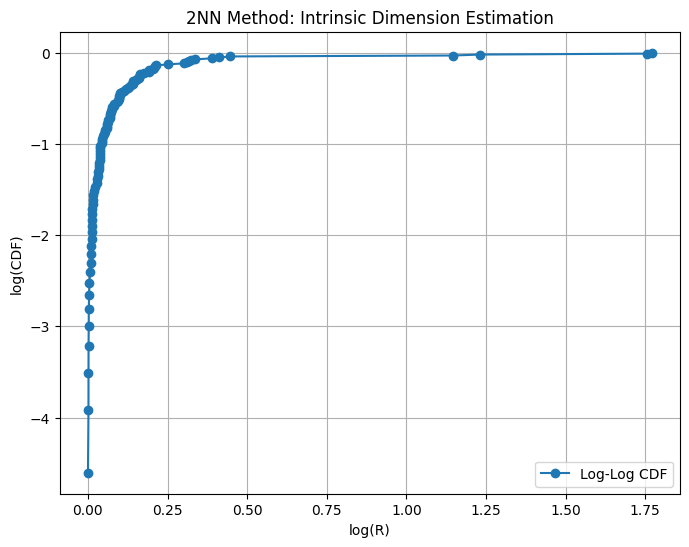

7.897177057159072

In [3]:
estimate_intrinsic_dimension(tensor[:100, 10, :])

In [3]:
# data = tensor[:, 0, :]

def plot(data):
    knn = NearestNeighbors(n_neighbors=3).fit(data)
    distances, _ = knn.kneighbors(data)
    
    r1 = distances[:, 1]  # First nearest neighbor
    r2 = distances[:, 2]
    
    ratios = r2 / r1
    
    # Log-log cumulative density function (CDF)
    sorted_ratios = np.sort(ratios)
    # cleaned_sorted_rations = sorted_ratios[~np.isnan(sorted_ratios) & ~np.isinf(sorted_ratios)]
    # Q1 = np.percentile(cleaned_sorted_rations, 25)
    # Q3 = np.percentile(cleaned_sorted_rations, 75)
    # 
    # # Calculate the IQR
    # IQR = Q3 - Q1
    # 
    # # Define the bounds for outliers
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    # 
    # # Remove outliers
    # cleaned_no_outlier_sorted_rations = cleaned_sorted_rations[(cleaned_sorted_rations >= lower_bound) & (cleaned_sorted_rations <= upper_bound)]
    
    
    cumulative_sum = np.cumsum(sorted_ratios)
    
    # Step 3: Normalize to get the cumulative distribution
    cumulative_distribution = cumulative_sum / cumulative_sum[-1]
    
    x_axis = np.log(sorted_ratios)
    y_axis = -np.log(1 - cumulative_distribution)
    
    plt.plot(x_axis, y_axis)
    plt.xlabel('Value')
    plt.ylabel('Cumulative Distribution')
    plt.title('Cumulative Distribution')
    plt.show()



/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/2576147060.py:10: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/2576147060.py:10: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1


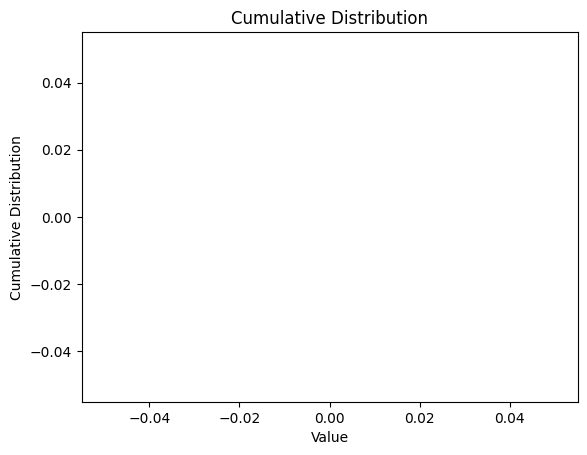

In [4]:
plot(tensor[:, 0, :])

In [26]:

def no_outlier_plot(data, title):

    knn = NearestNeighbors(n_neighbors=3).fit(data)
    distances, _ = knn.kneighbors(data)
    
    r1 = distances[:, 1]  # First nearest neighbor
    r2 = distances[:, 2]
    
    ratios = r2 / r1
    # Log-log cumulative density function (CDF)
    sorted_ratios = np.sort(ratios)
    cleaned_sorted_rations = sorted_ratios[~np.isnan(sorted_ratios) & ~np.isinf(sorted_ratios)]
    Q1 = np.percentile(cleaned_sorted_rations, 25)
    Q3 = np.percentile(cleaned_sorted_rations, 75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    cleaned_no_outlier_sorted_rations = cleaned_sorted_rations[(cleaned_sorted_rations >= lower_bound) & (cleaned_sorted_rations <= upper_bound)]
    
    
    cumulative_sum = np.cumsum(cleaned_no_outlier_sorted_rations)
    
    # Step 3: Normalize to get the cumulative distribution
    cumulative_distribution = cumulative_sum / cumulative_sum[-1]
    
    x_axis = np.log(cleaned_no_outlier_sorted_rations)
    y_axis = -np.log(1 - cumulative_distribution)
    
    y_axis = y_axis[:-500]
    x_axis = x_axis[:len(y_axis)]
    
    print(len(y_axis))
    
    
    plt.plot(x_axis, y_axis)
    plt.xlabel('log(mu)')
    plt.ylabel('-log(1 - F)')
    plt.title(title)
    plt.show()


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


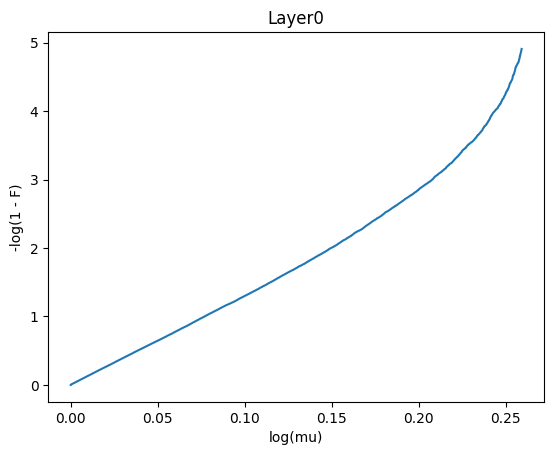

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


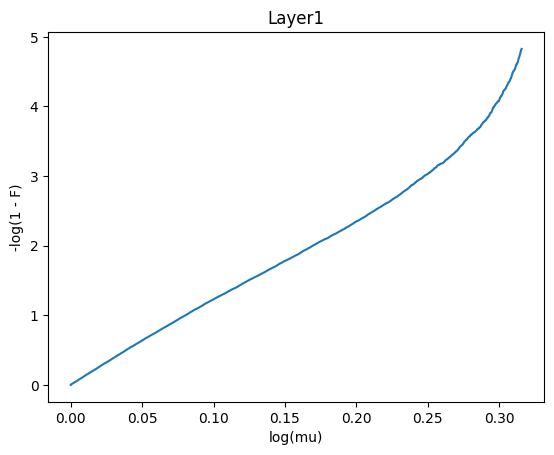

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


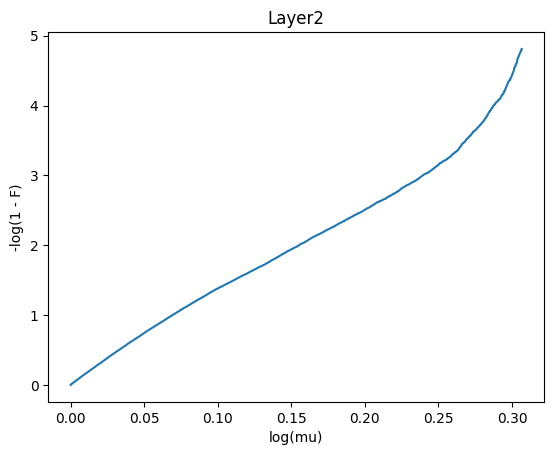

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


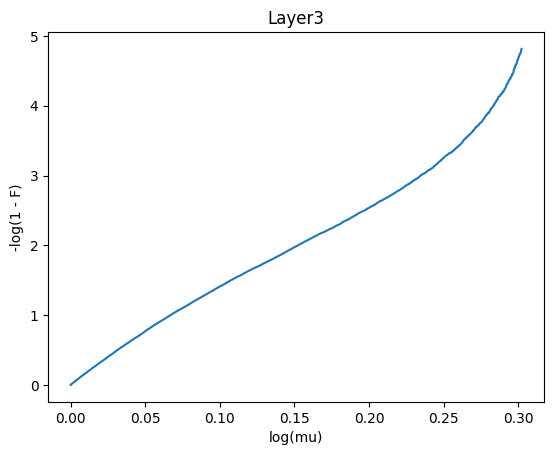

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


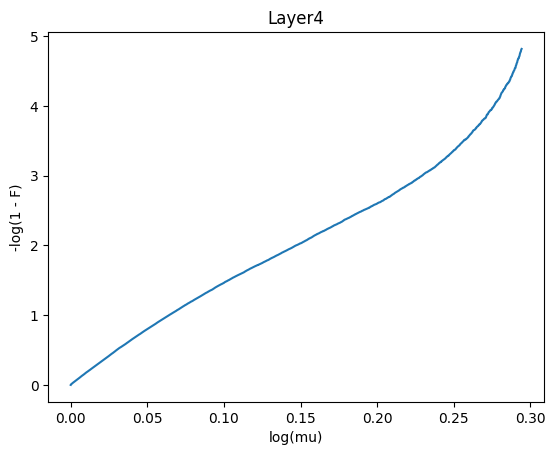

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


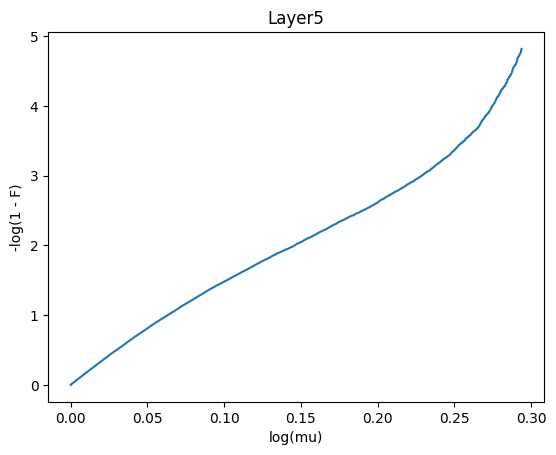

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


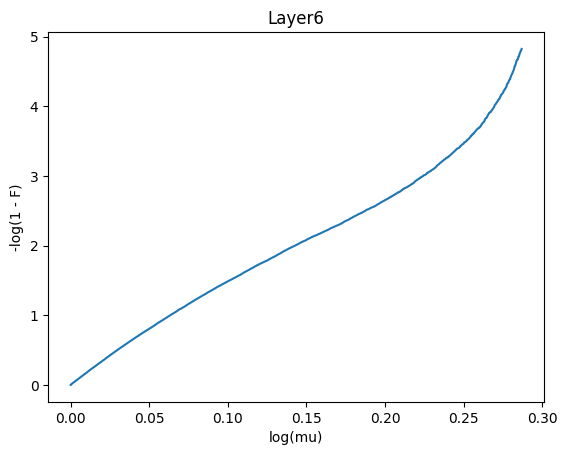

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


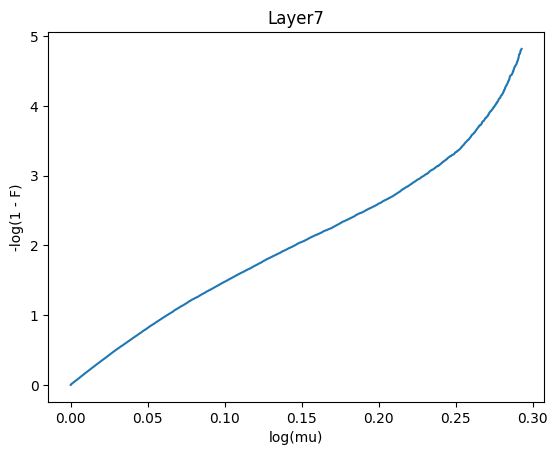

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


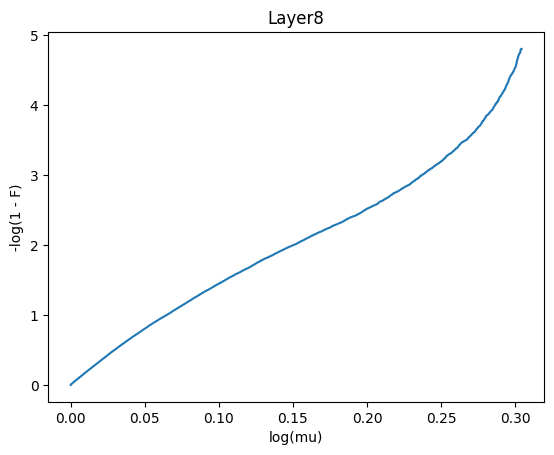

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


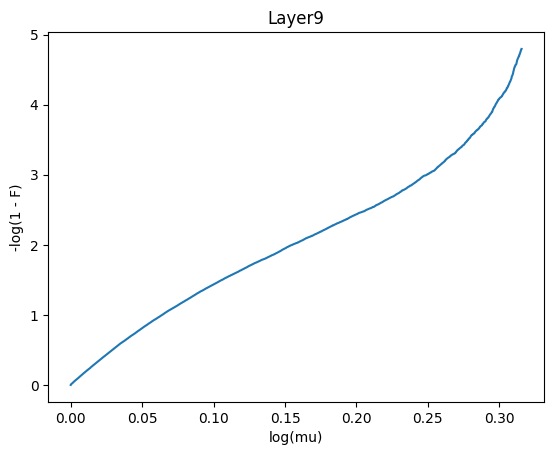

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


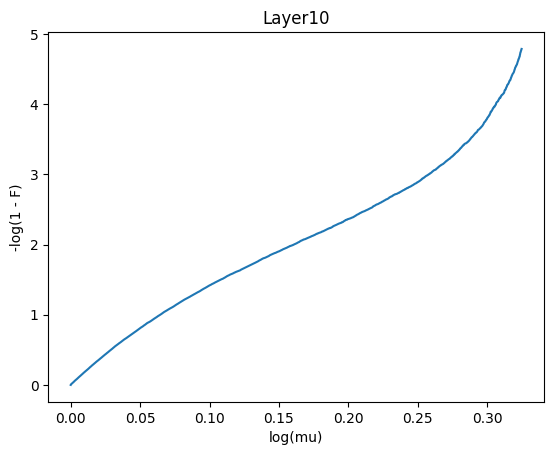

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


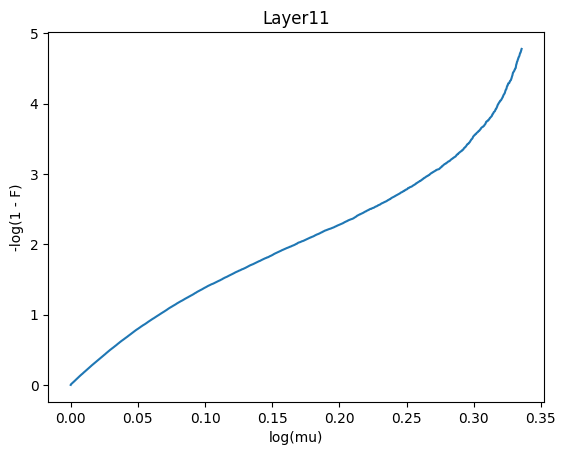

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


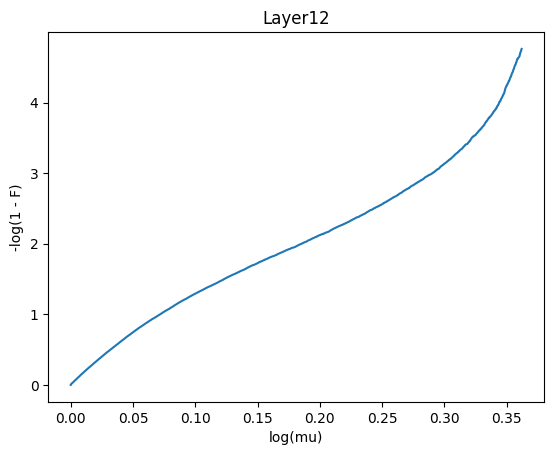

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


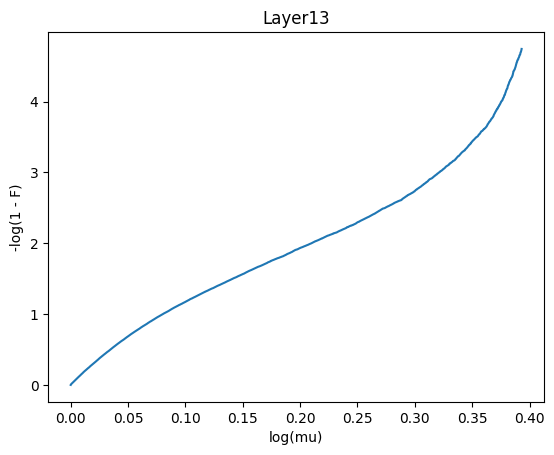

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


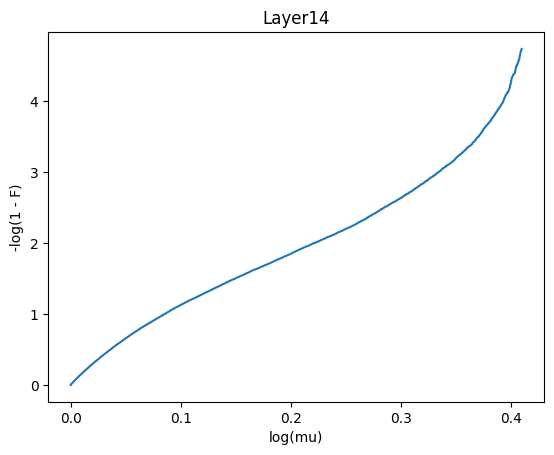

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


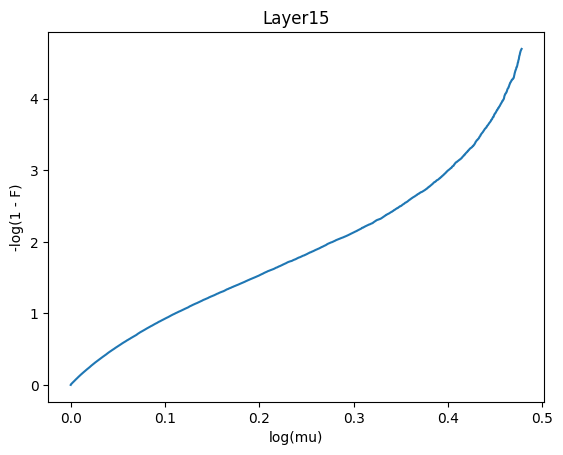

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


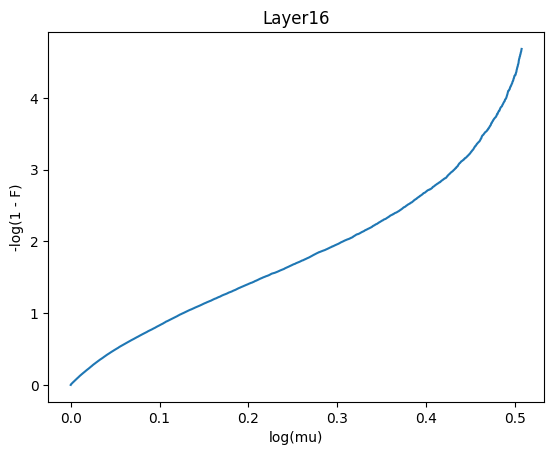

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


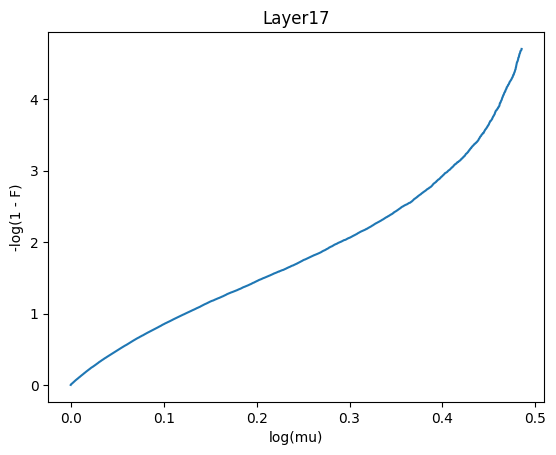

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


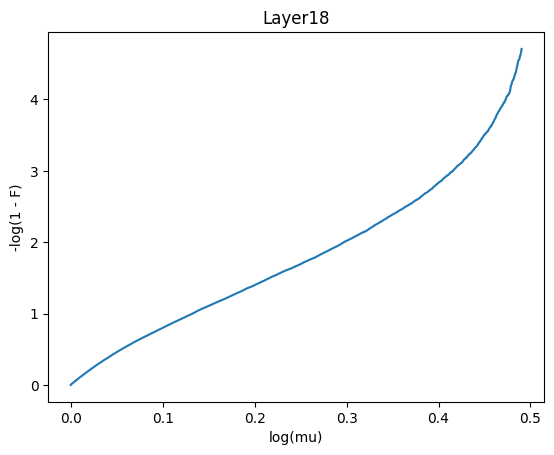

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


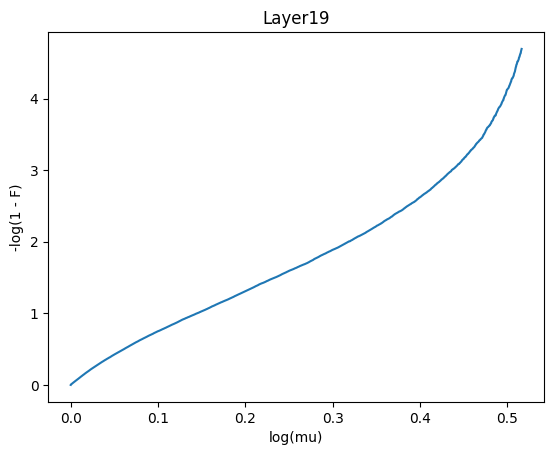

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


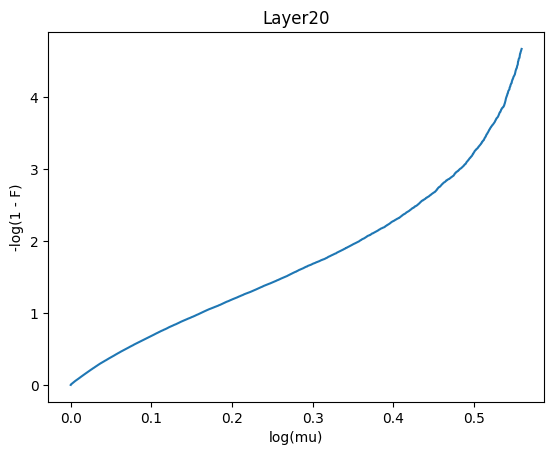

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


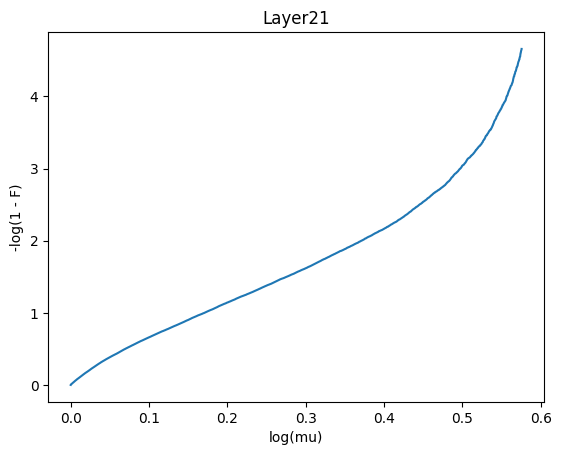

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


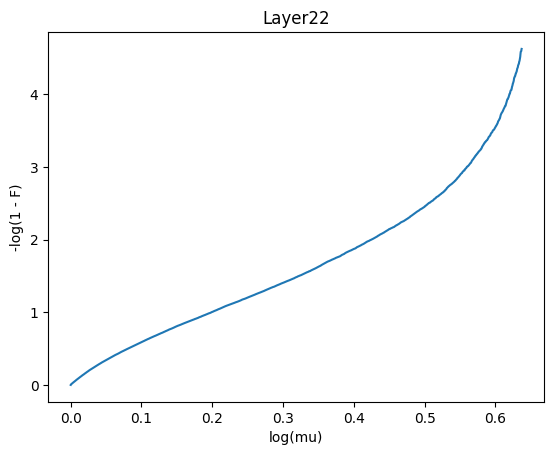

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


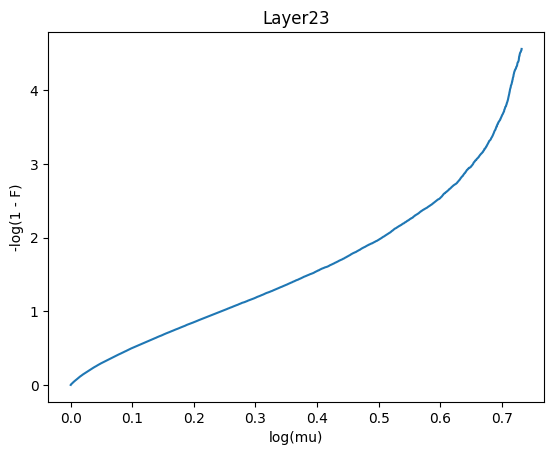

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


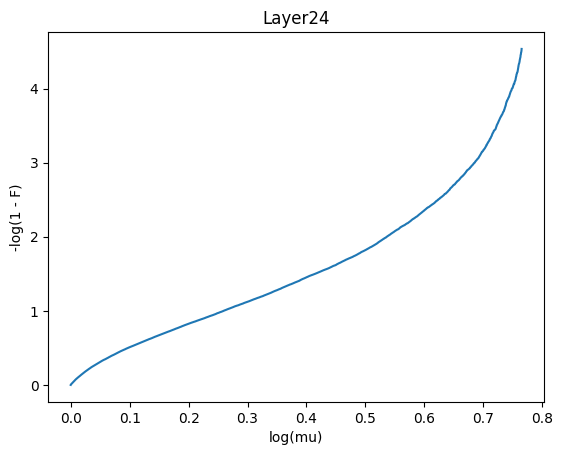

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


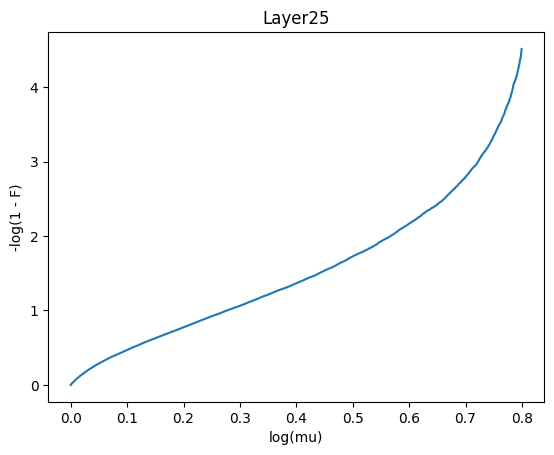

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


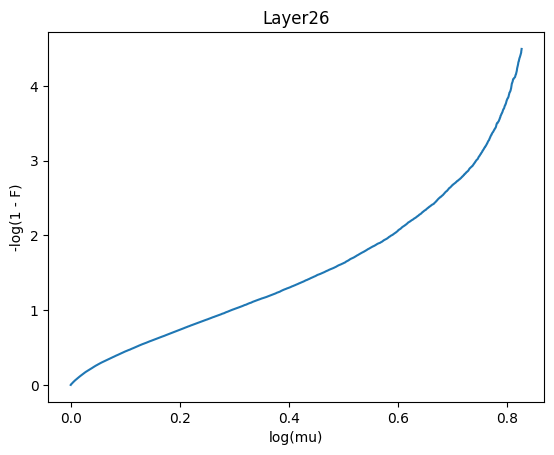

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


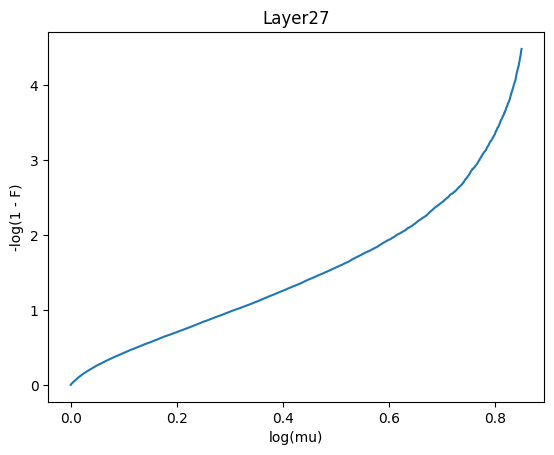

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


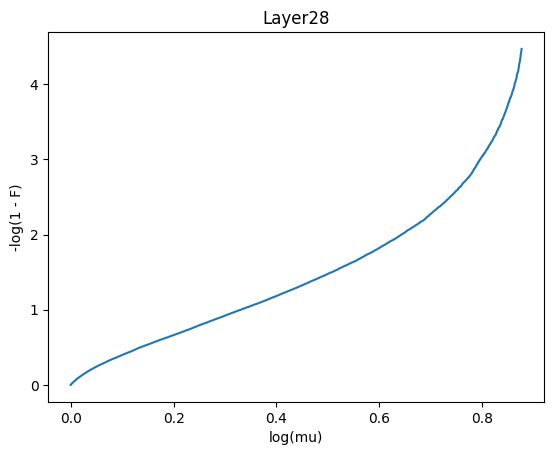

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


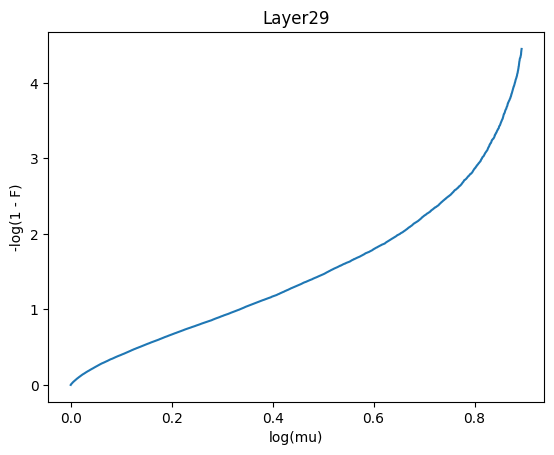

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


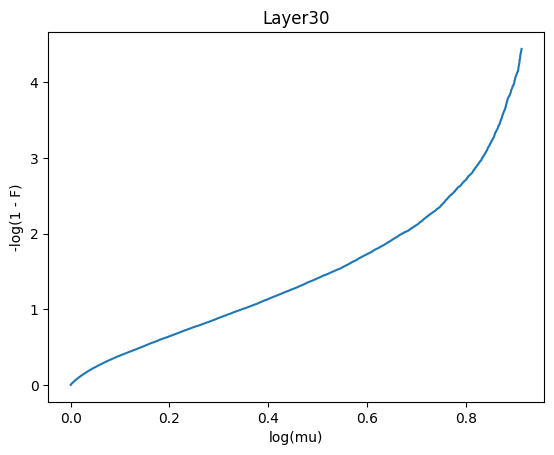

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


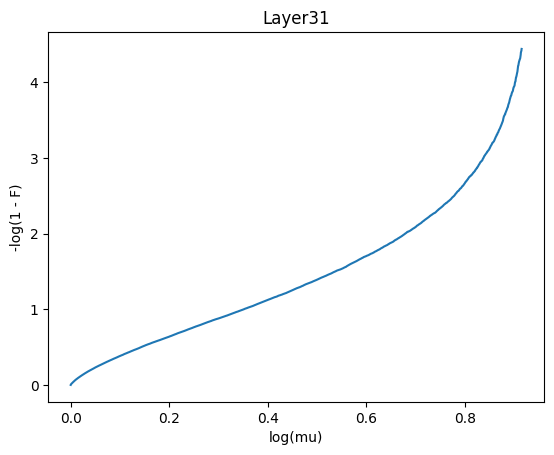

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


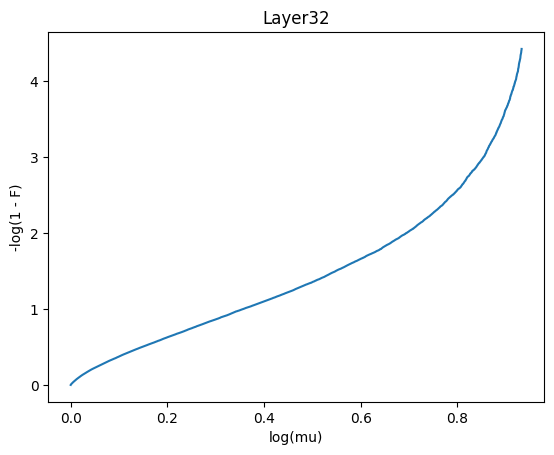

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


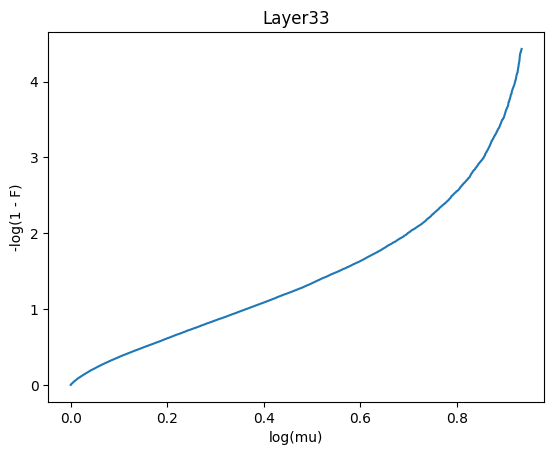

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


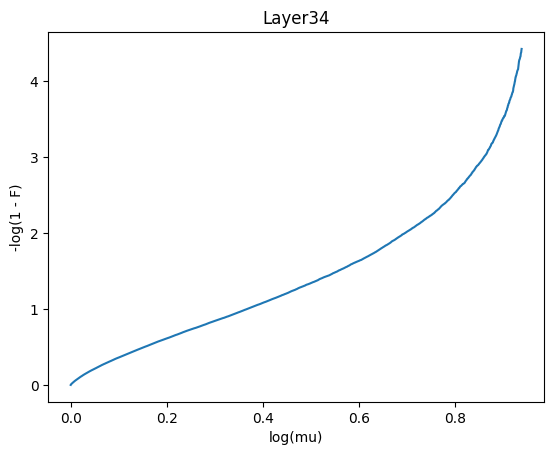

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


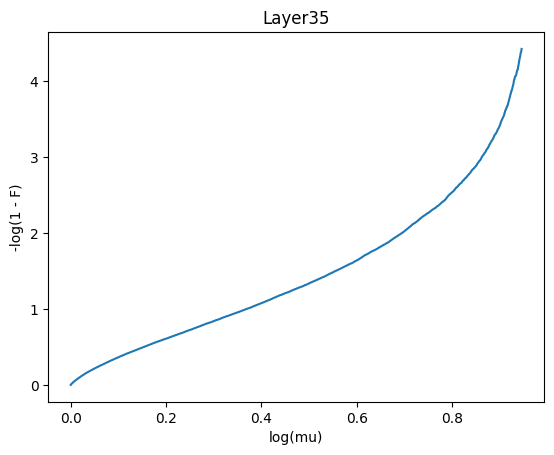

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


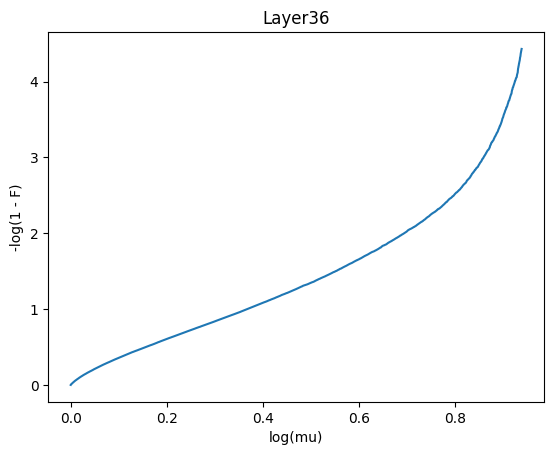

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


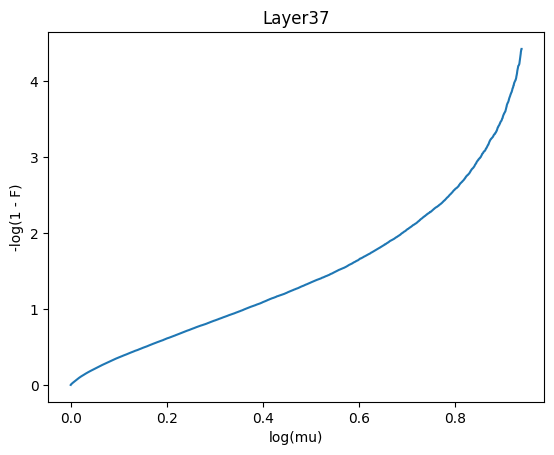

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


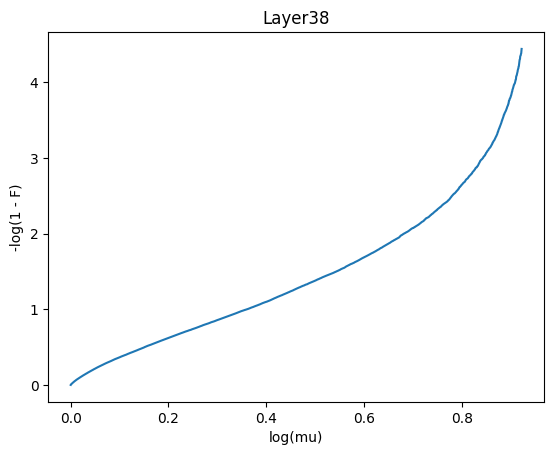

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


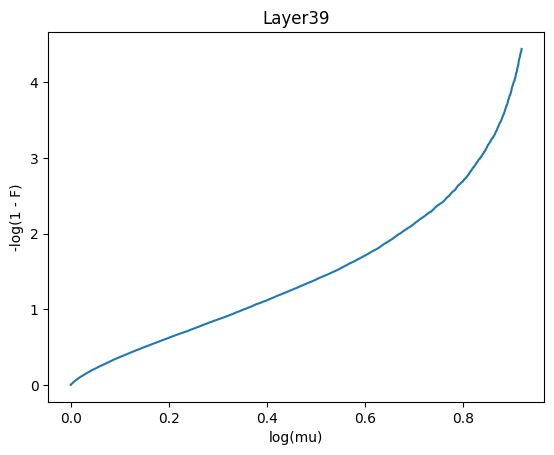

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


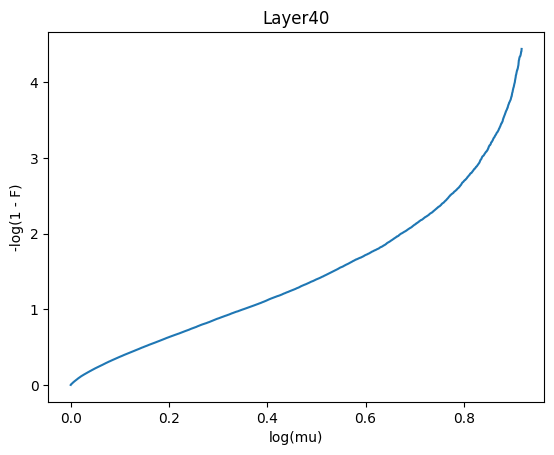

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


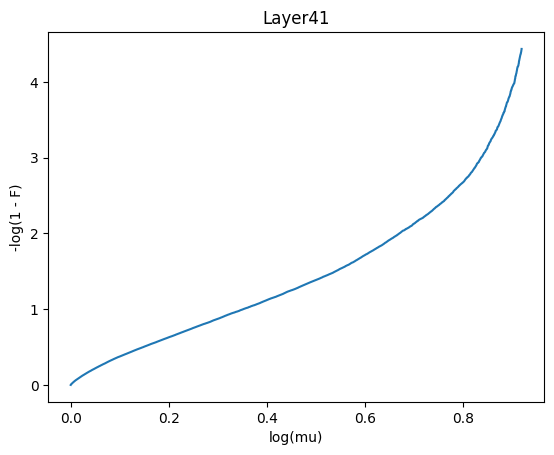

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


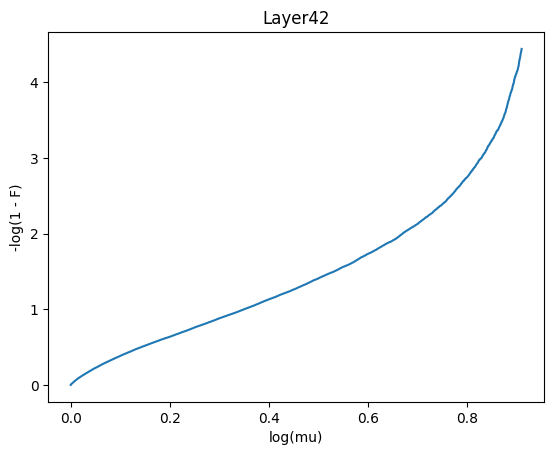

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


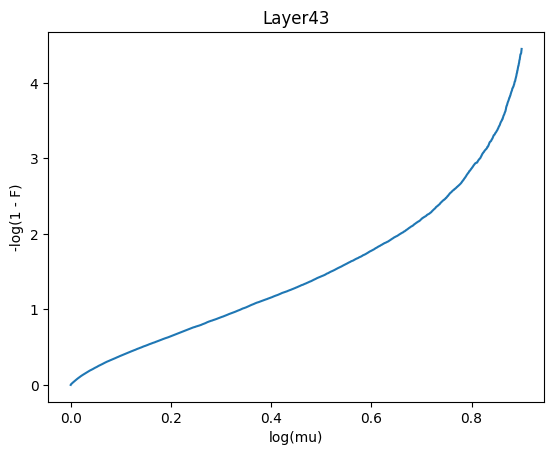

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


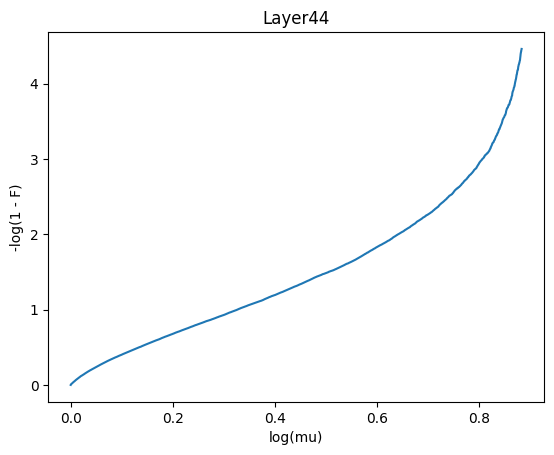

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


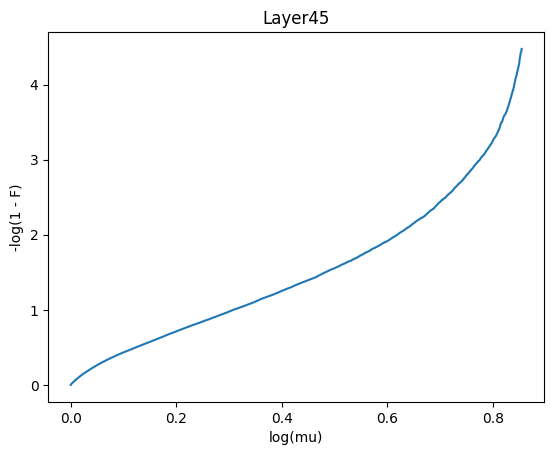

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


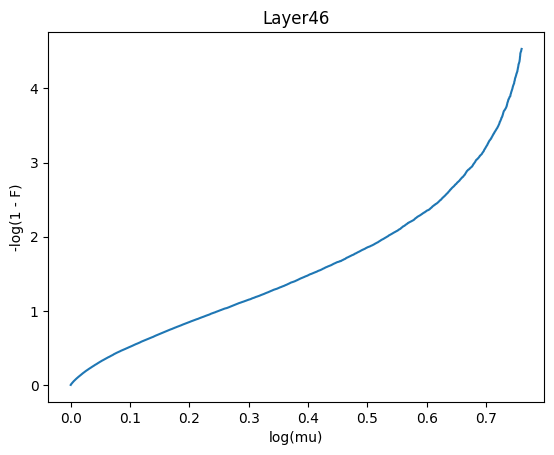

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


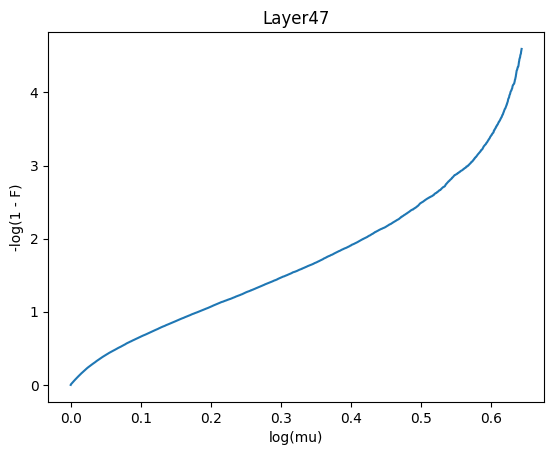

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3649439203.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


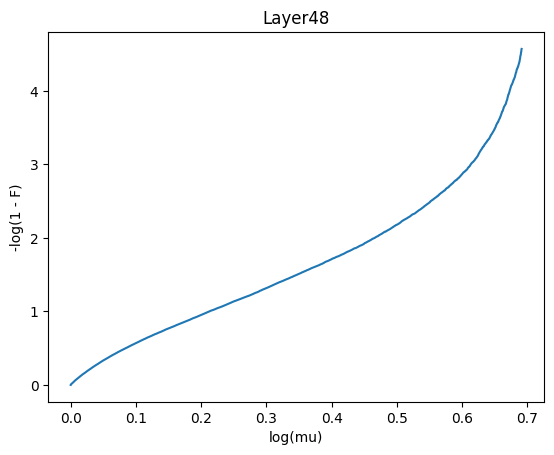

In [25]:
for i in range(tensor.shape[1]):
    no_outlier_plot(tensor[:, i, :], f"Layer{i}")
    
# -200

32414


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


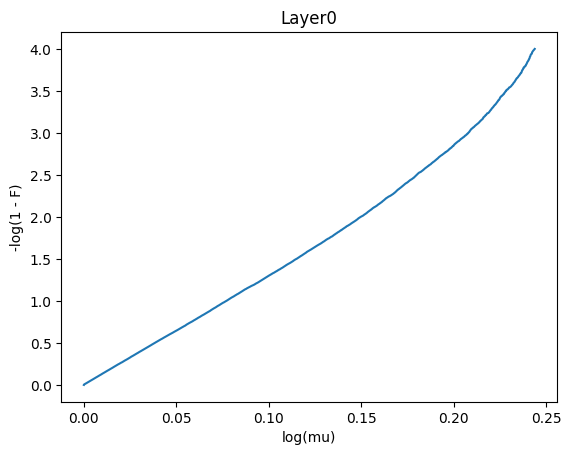

31390


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


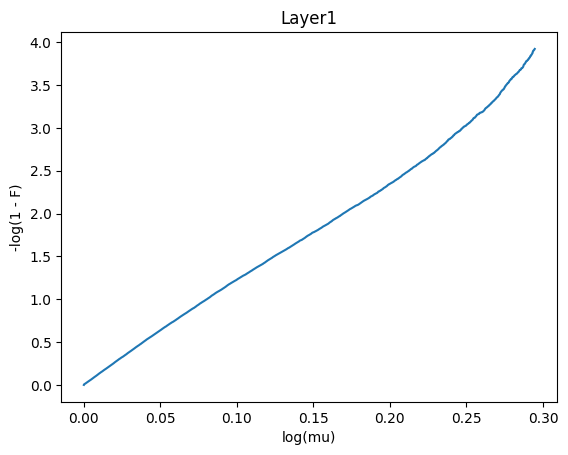

30897


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


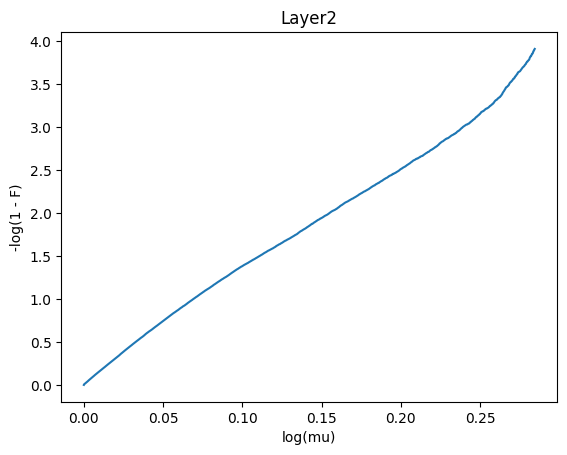

30909


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


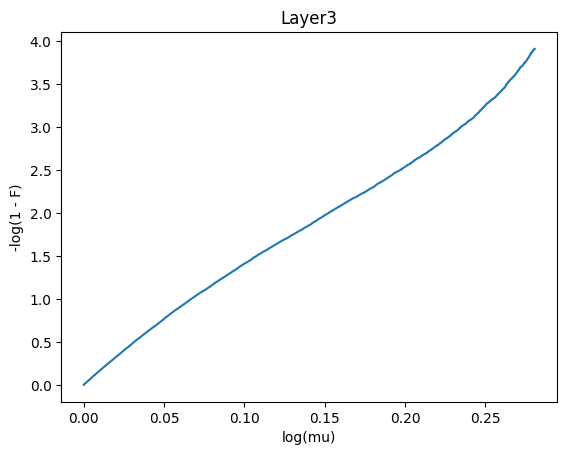

30858


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


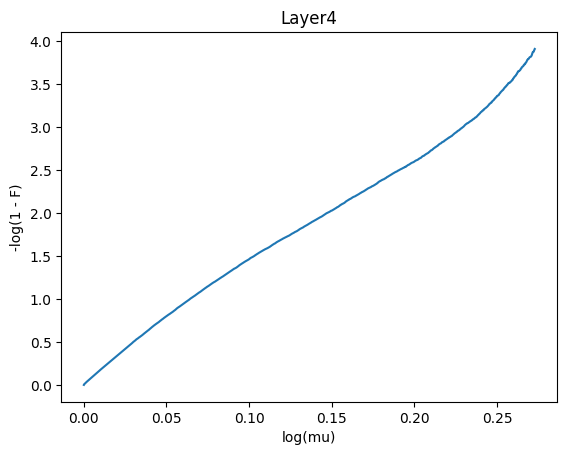

30831


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


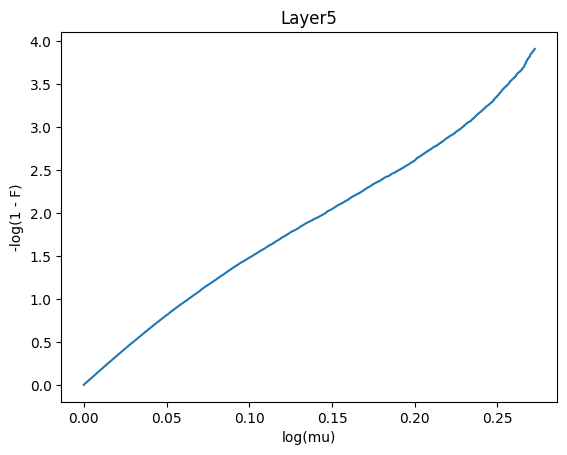

30853


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


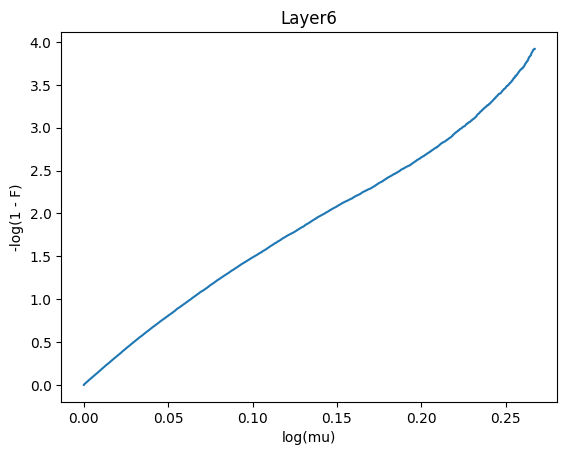

30811


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


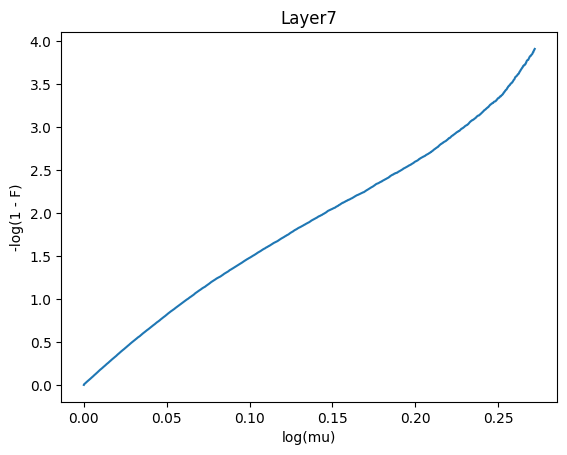

30756


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


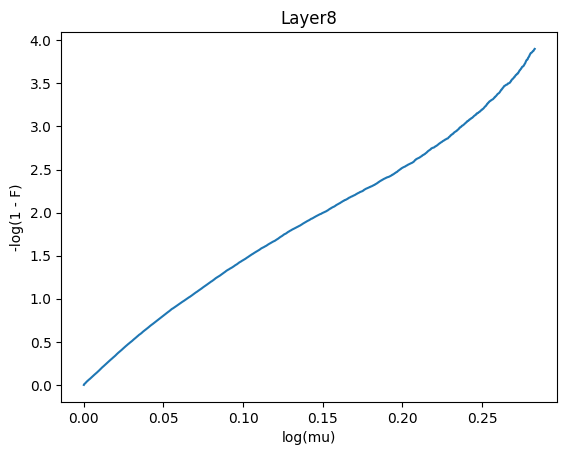

30735


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


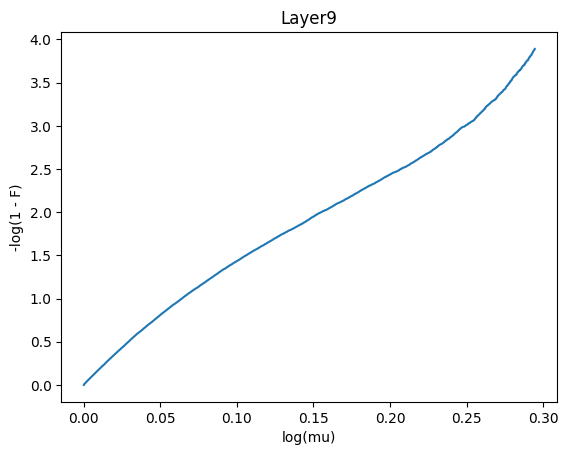

30741


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


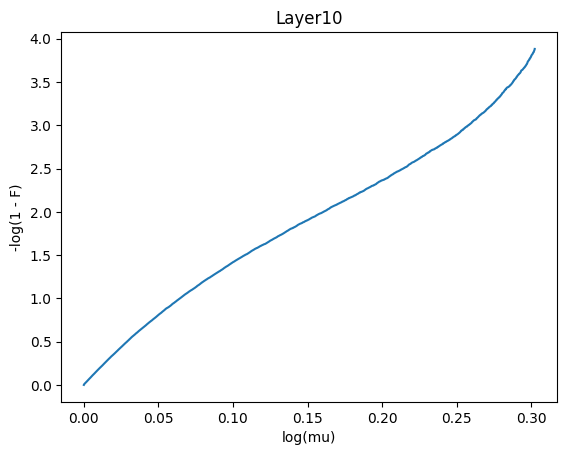

30768


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


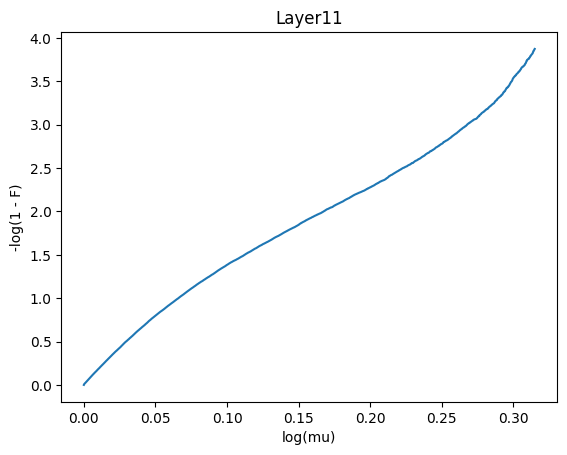

30840


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


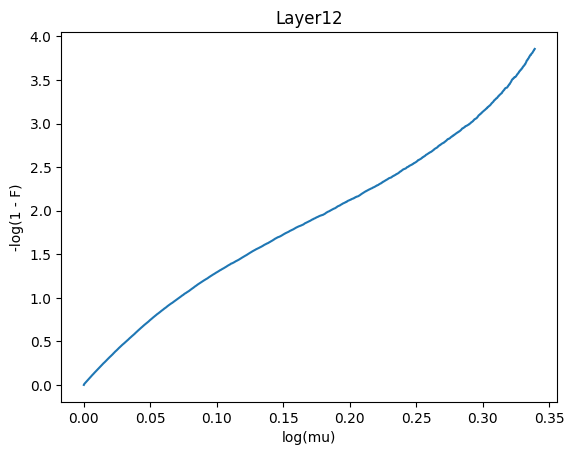

30977


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


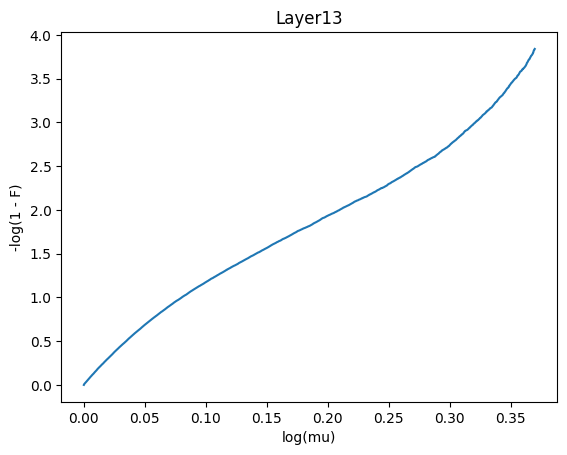

31072


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


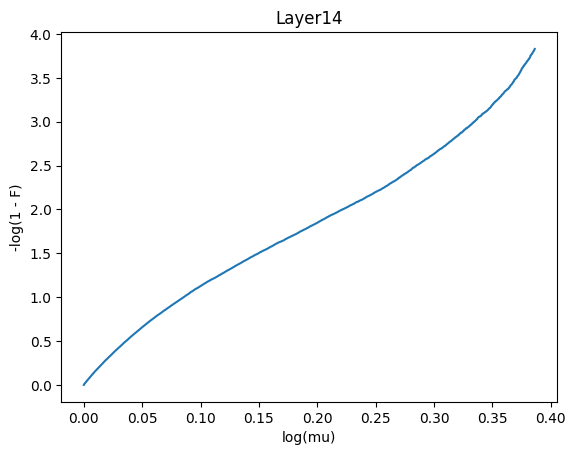

31417


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


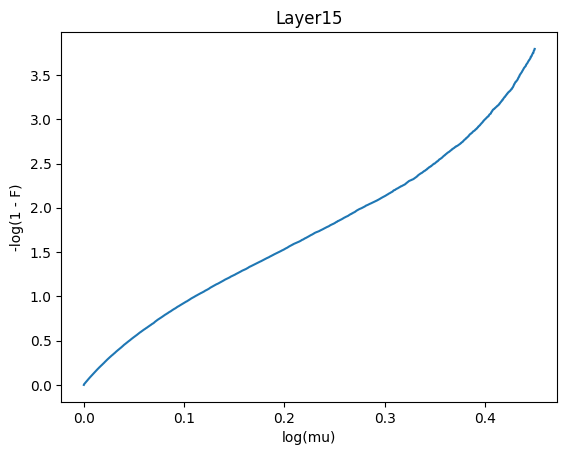

31596


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


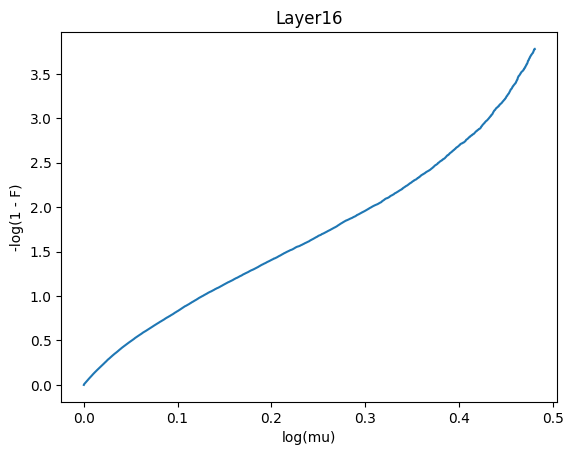

31708


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


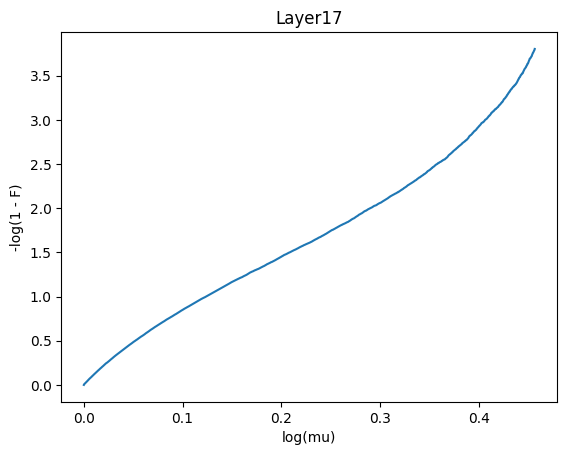

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


31808


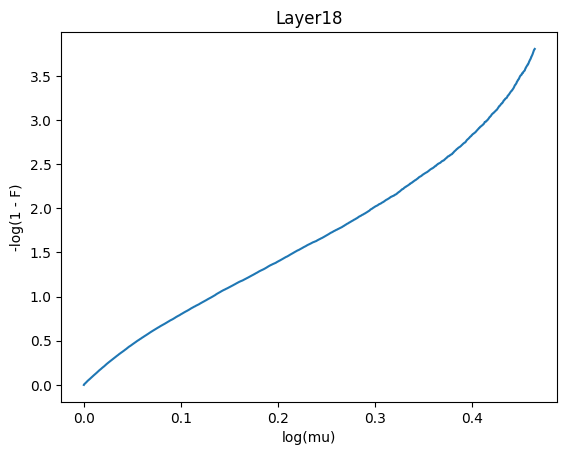

31881


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


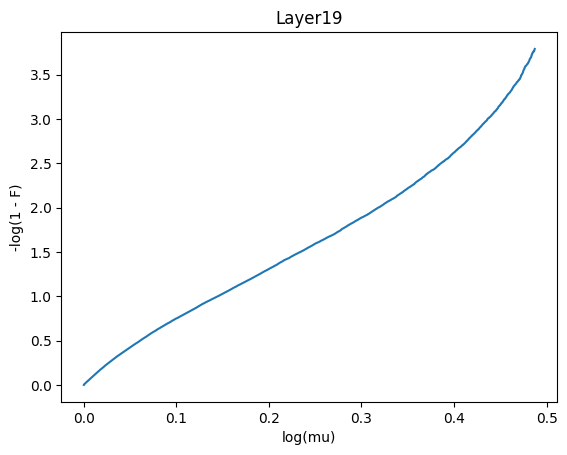

32012


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


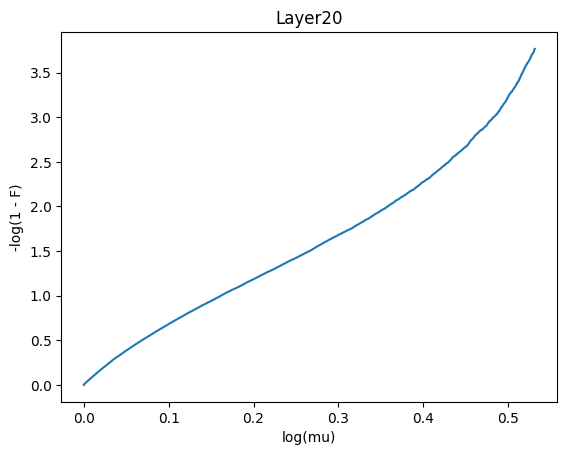

32091


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


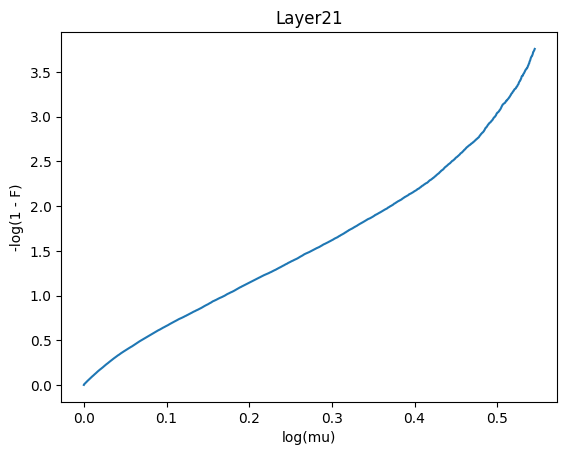

32240


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


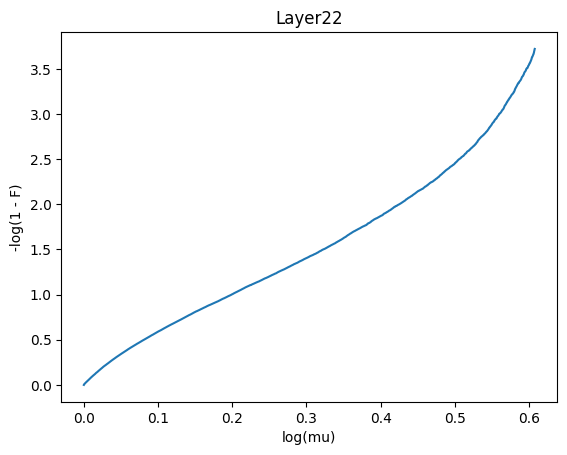

32281


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


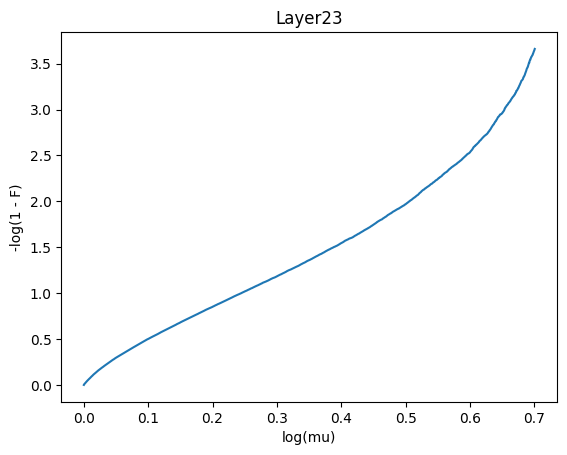

32320


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


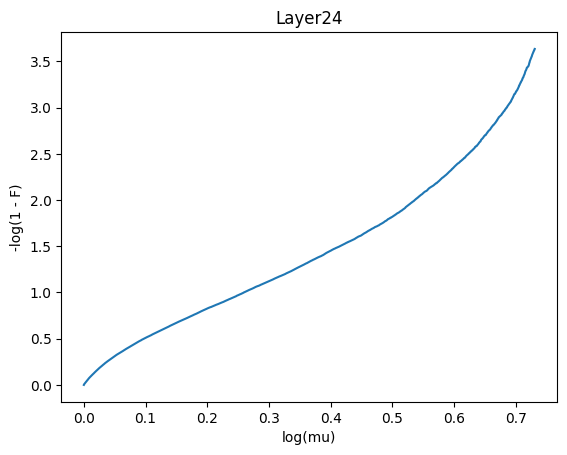

32310


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


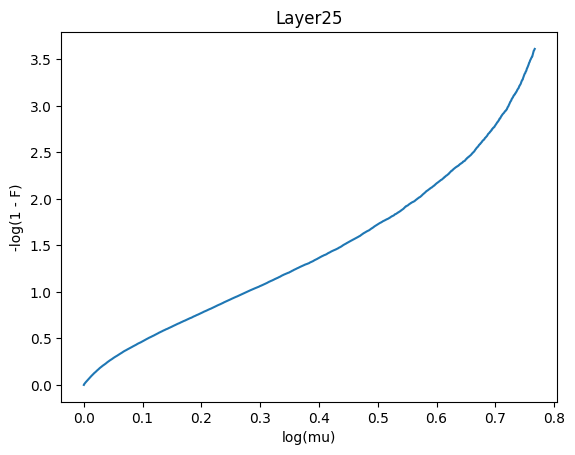

32308


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


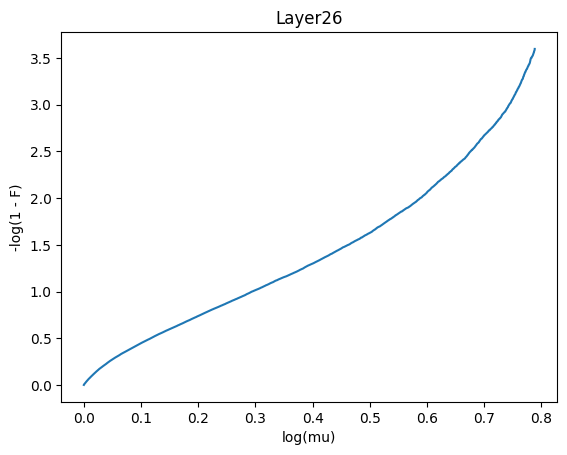

32254


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


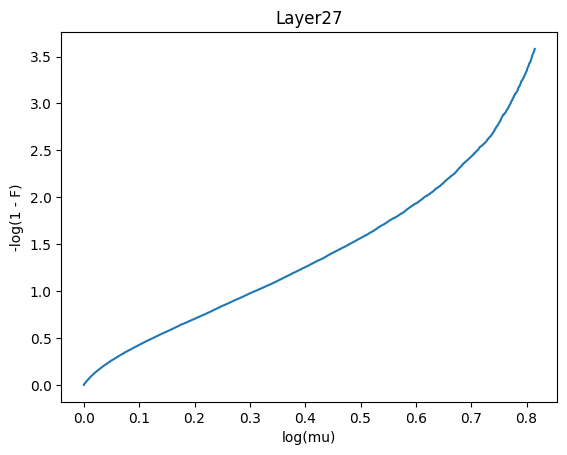

32385


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


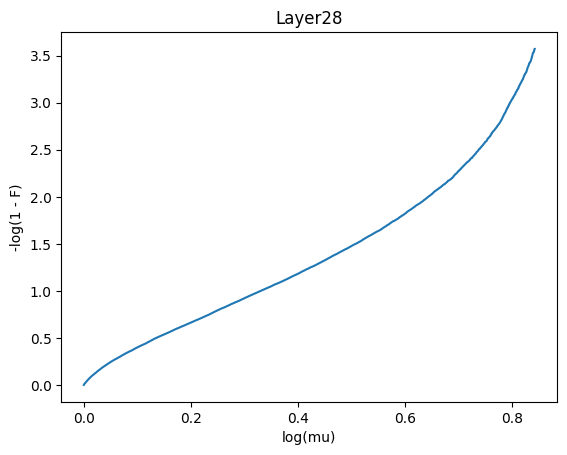

32194


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


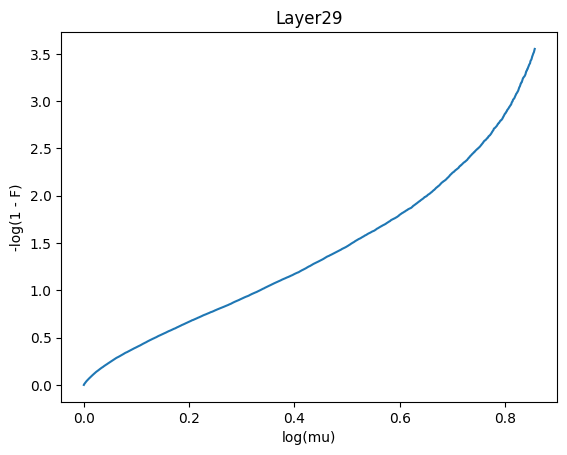

32255


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


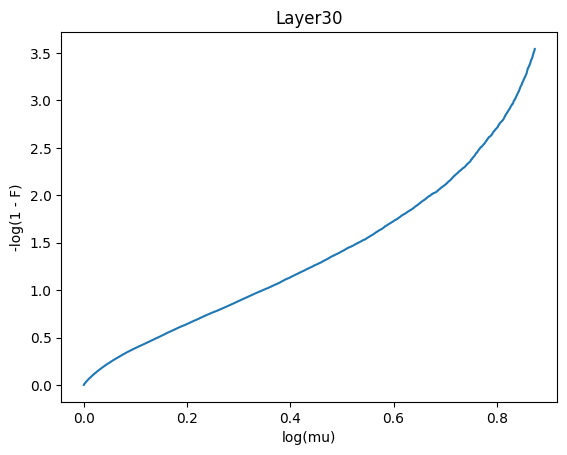

32253


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


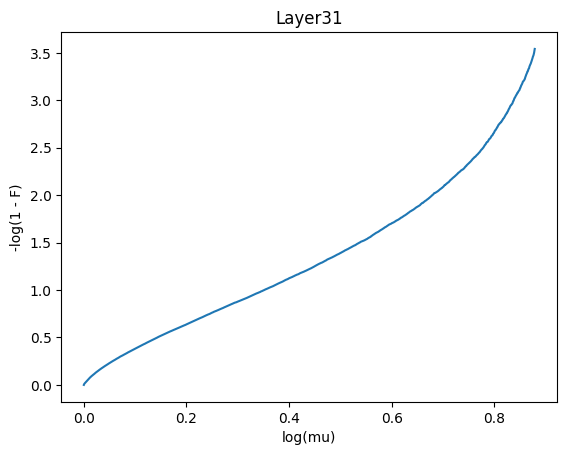

32292


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


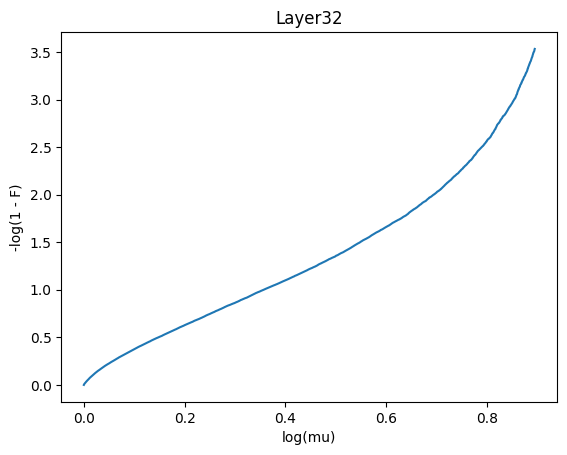

32325


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


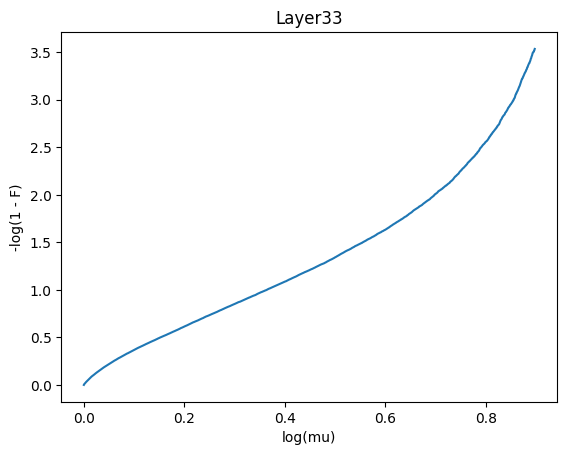

32265


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


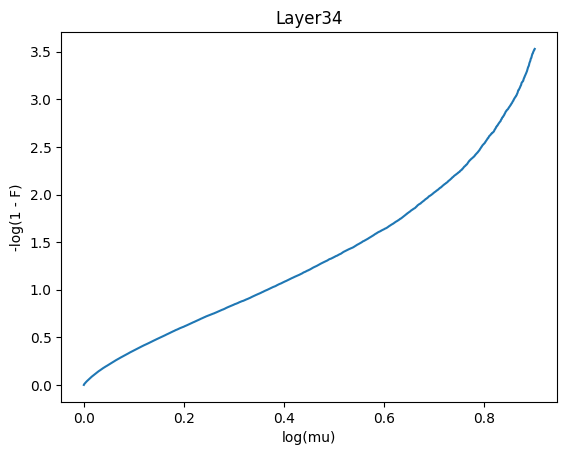

32270


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


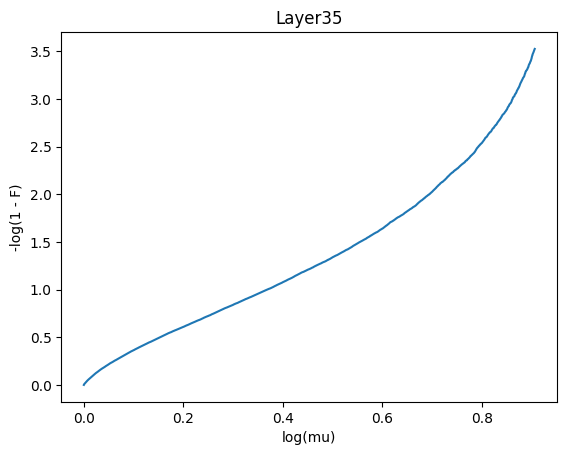

32257


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


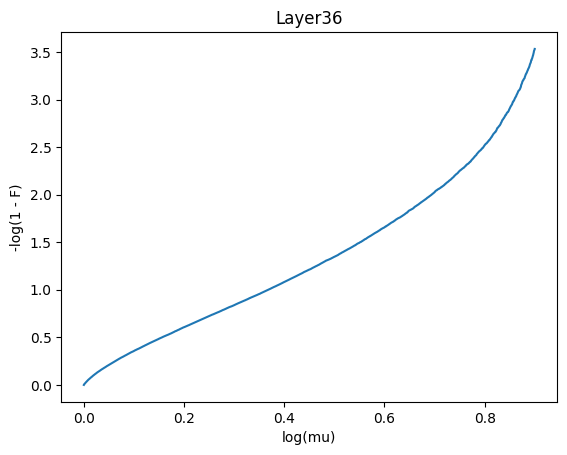

32280


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


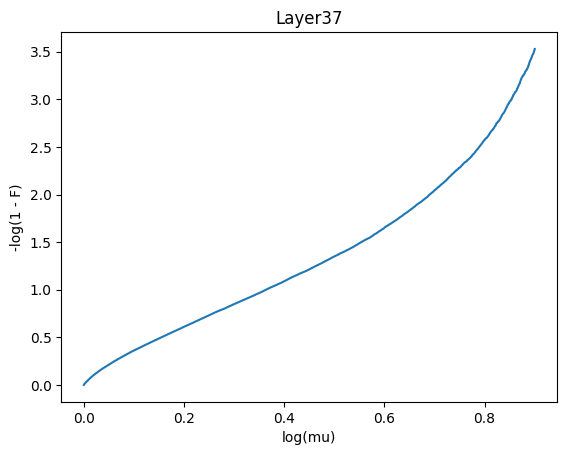

32318


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


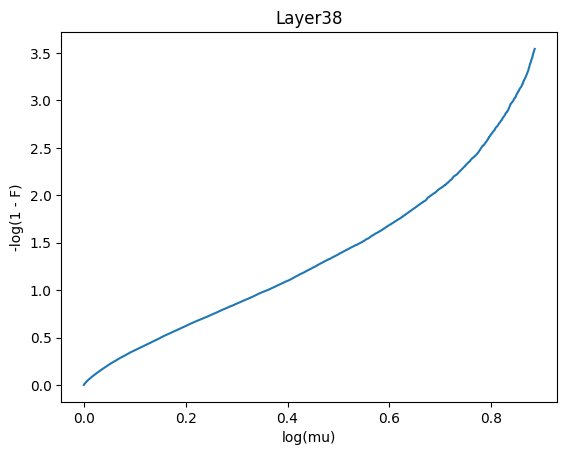

32264


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


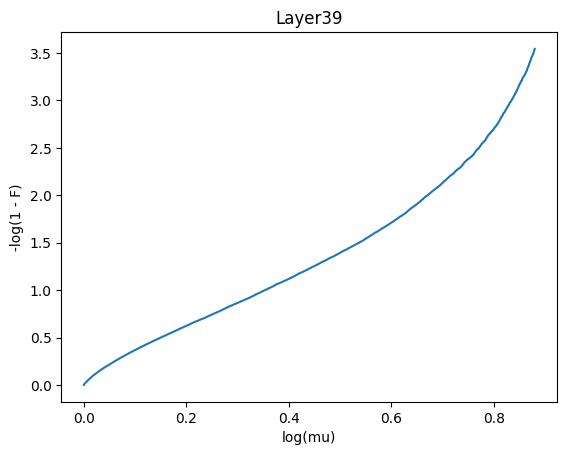

32272


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


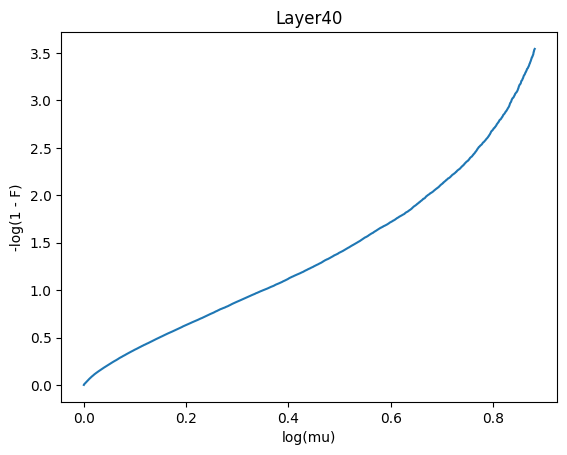

32285


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


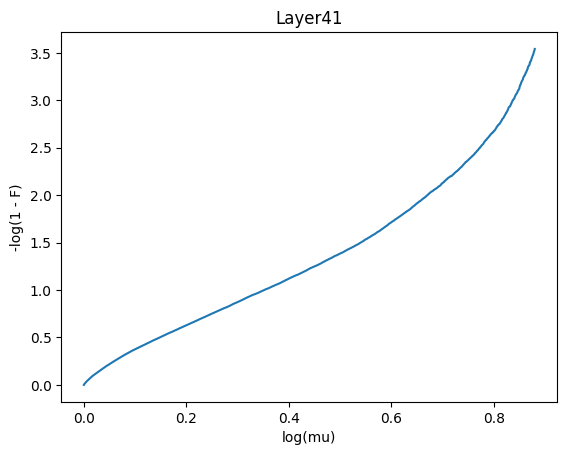

32250


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


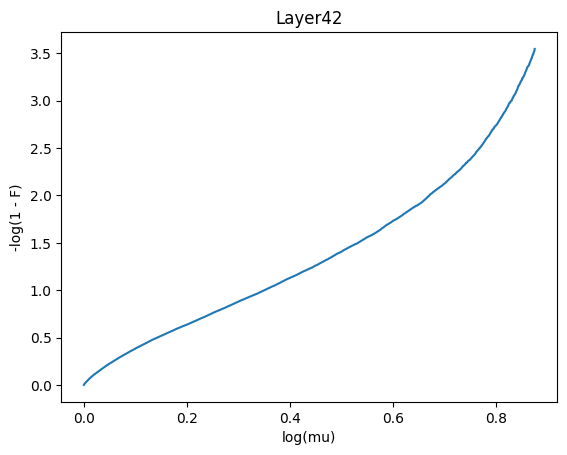

32254


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


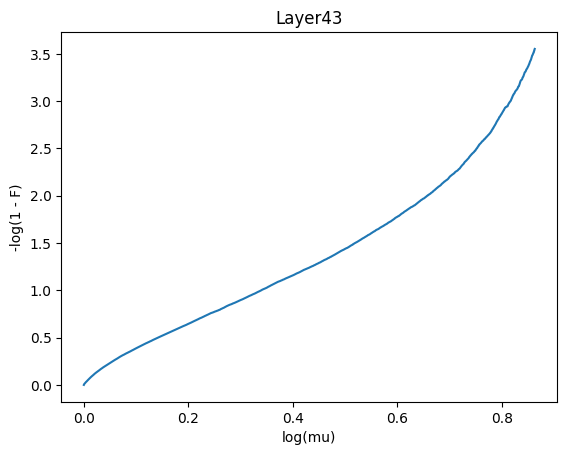

32208


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


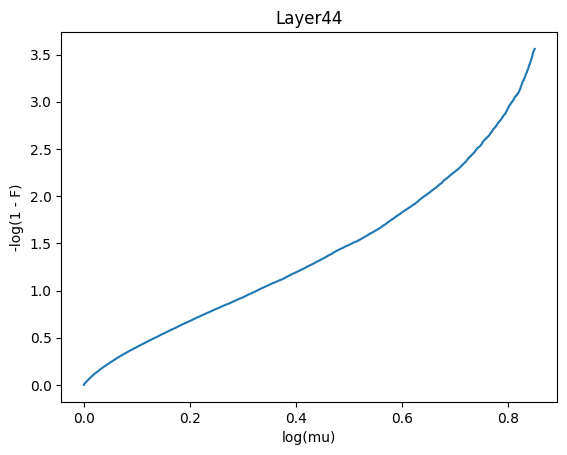

32268


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


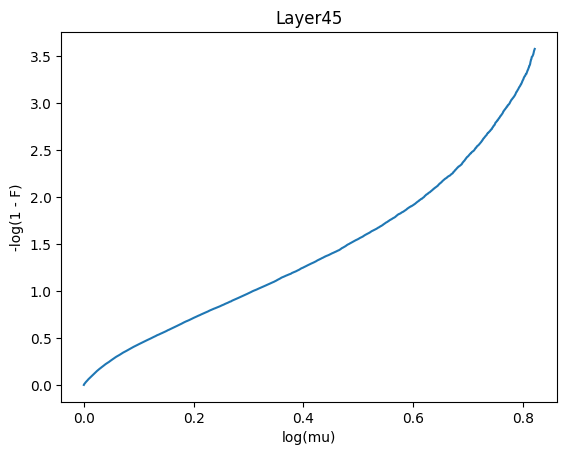

32200


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


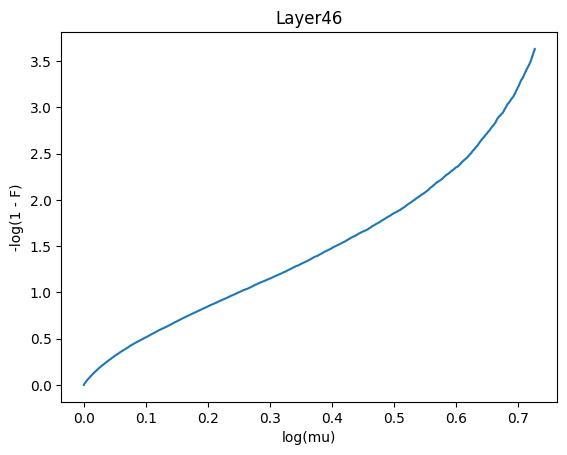

31852


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


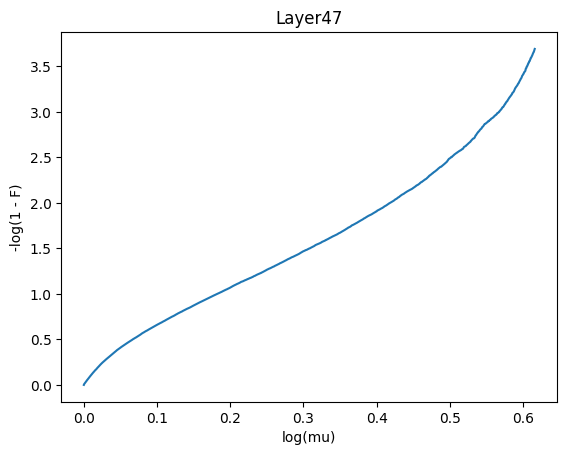

31960


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


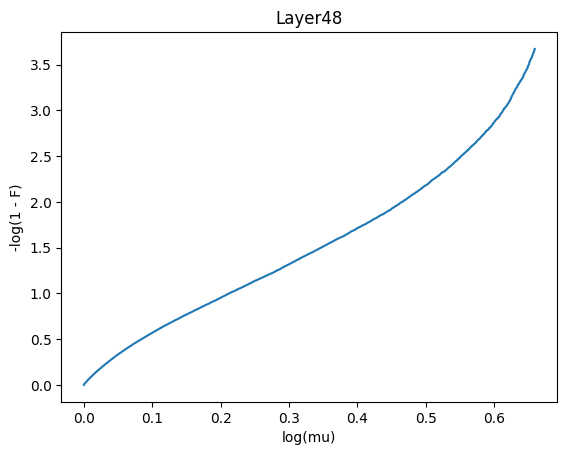

In [27]:
for i in range(tensor.shape[1]):
    no_outlier_plot(tensor[:, i, :], f"Layer{i}")
    


28729


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


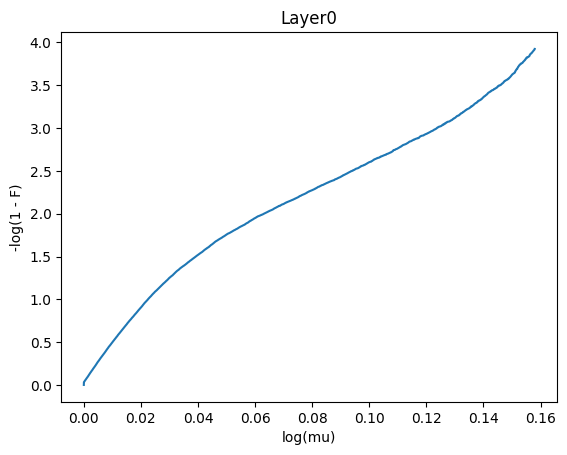

29847


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


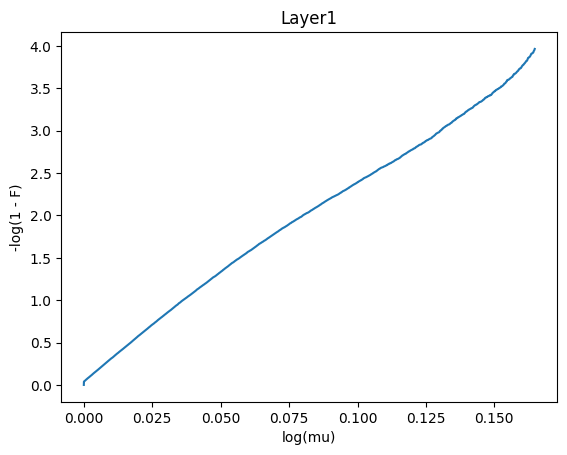

31624


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


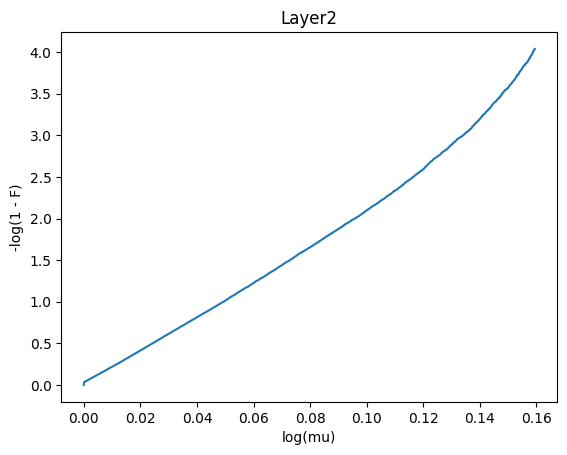

32416


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


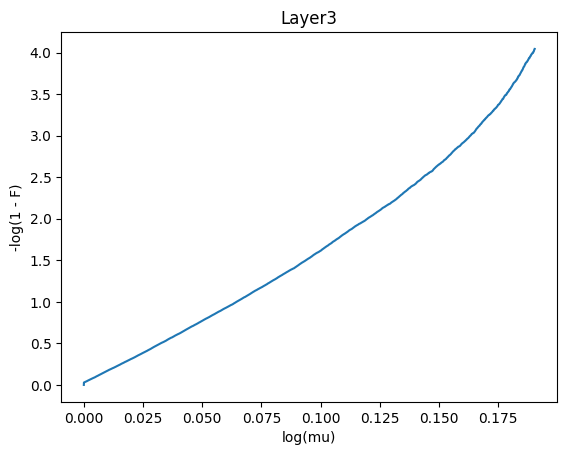

32547


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


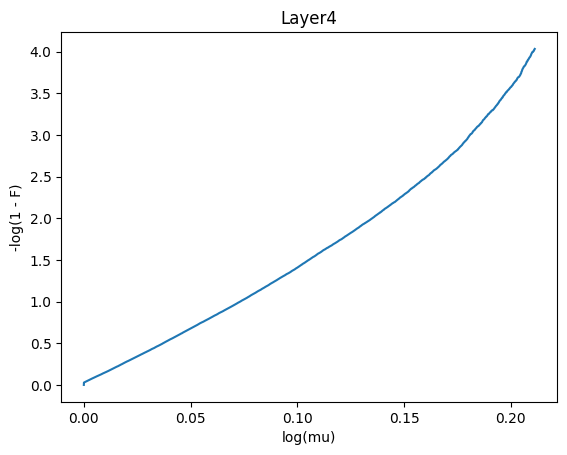

32653


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


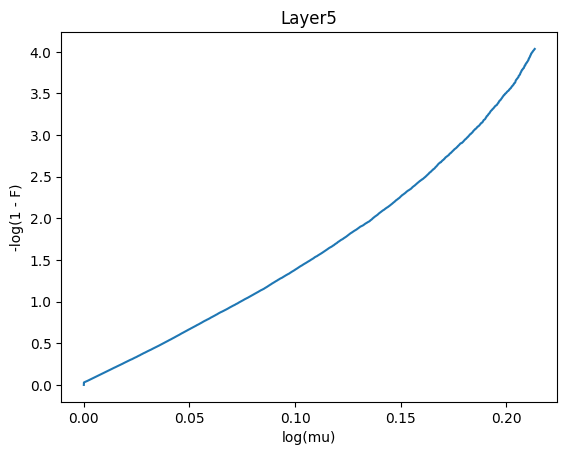

32716


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


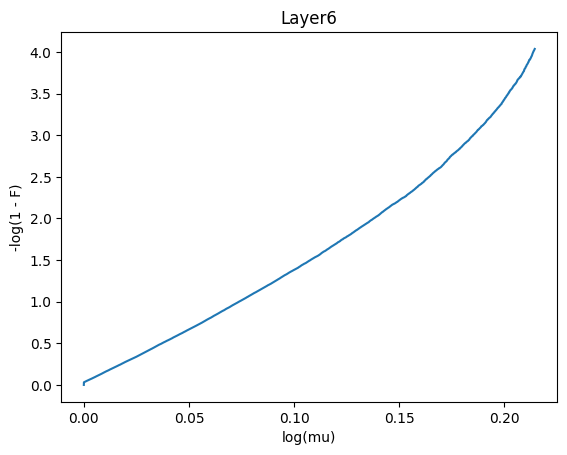

32634


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


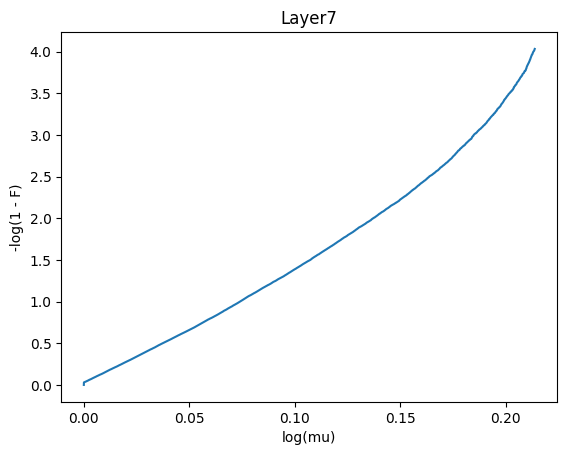

32708


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


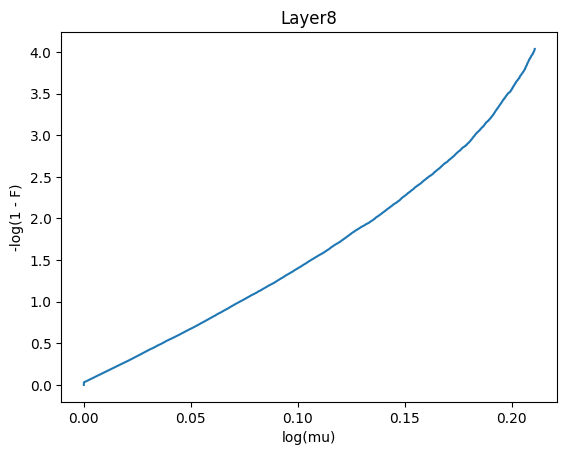

32666


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


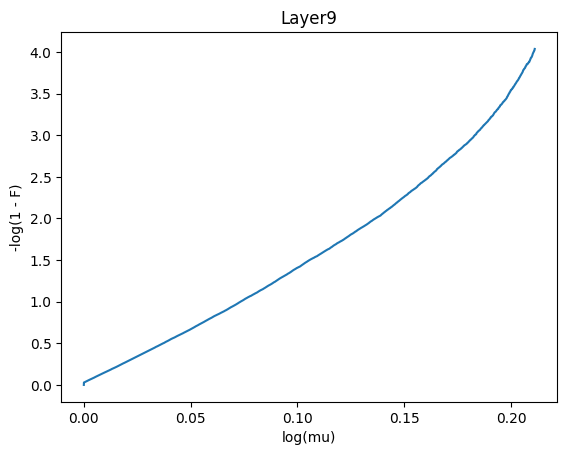

32695


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


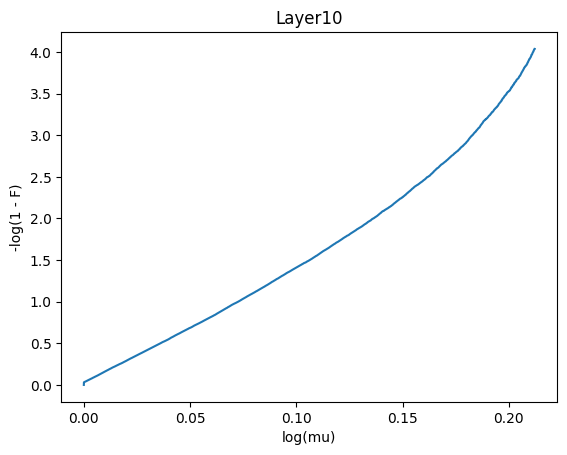

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


32740


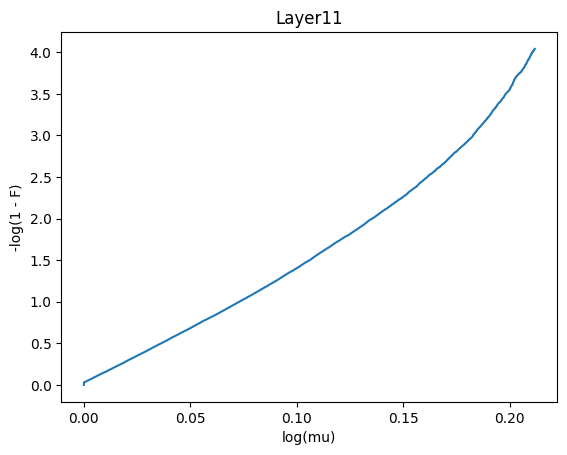

32936


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


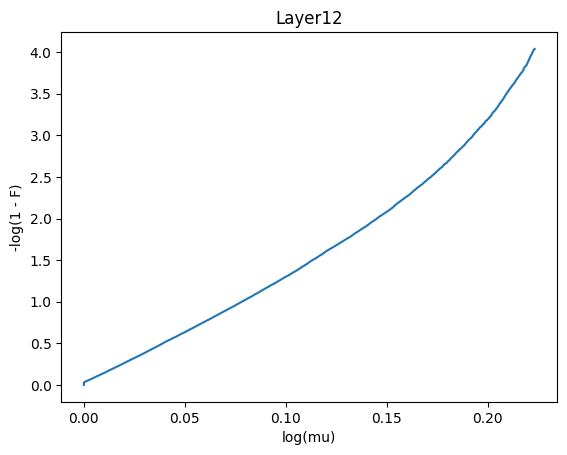

32920


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


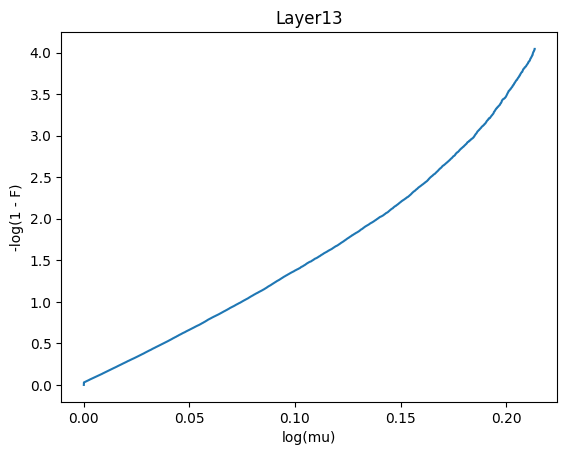

32888


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


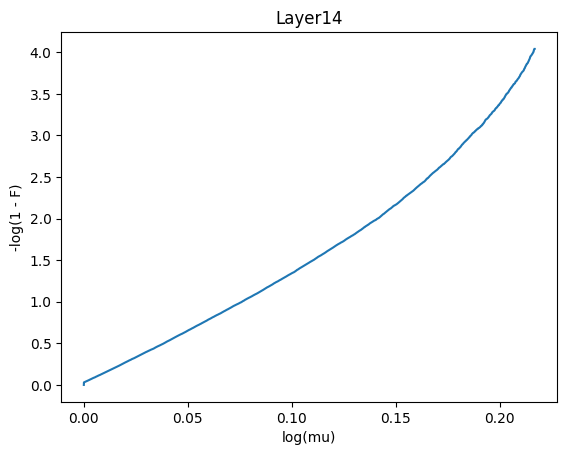

32947


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


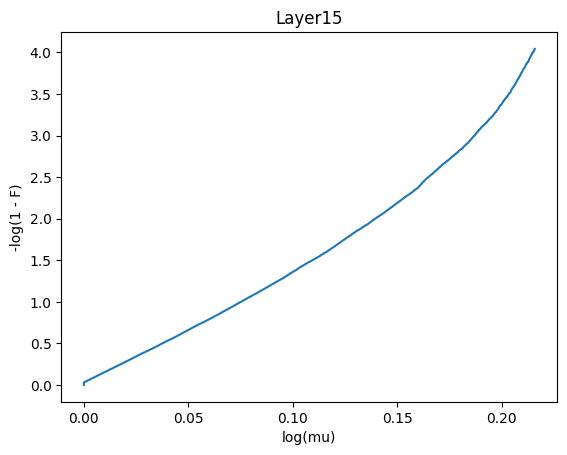

32866


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


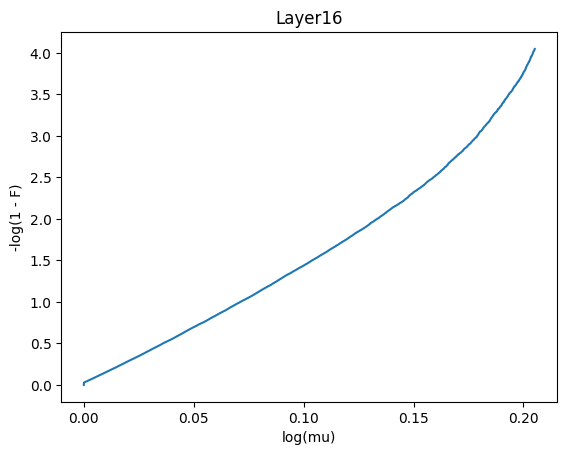

32764


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


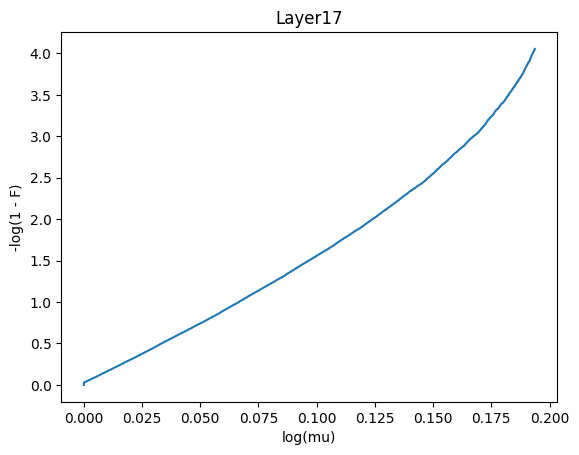

32659


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


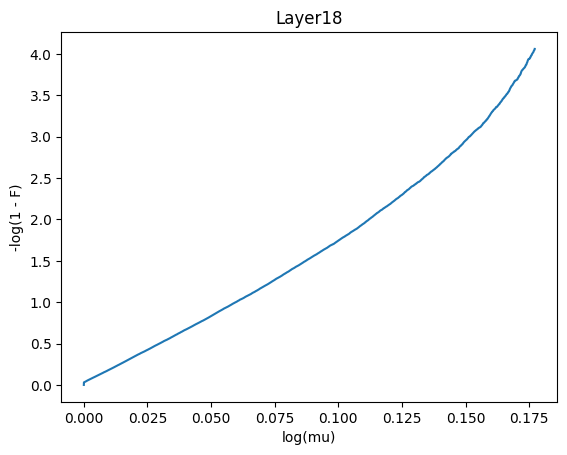

32587


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


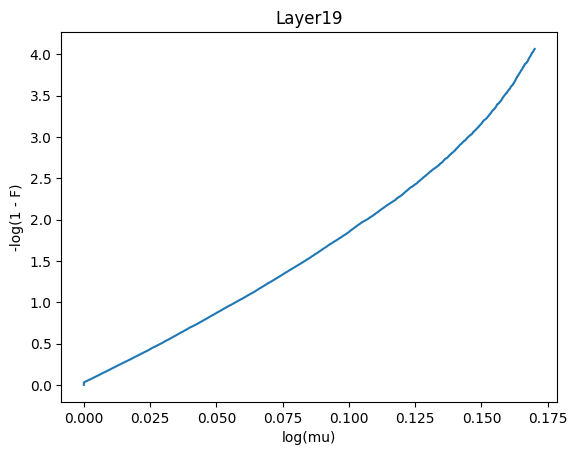

32608


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


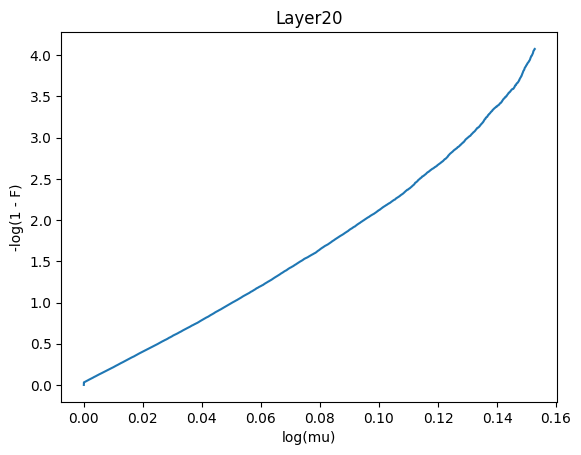

32365


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


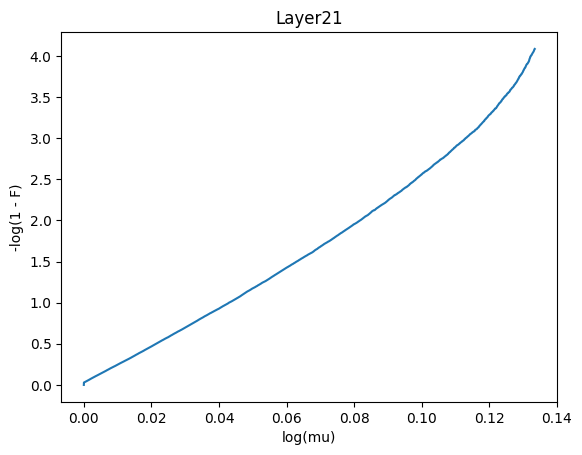

32323


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


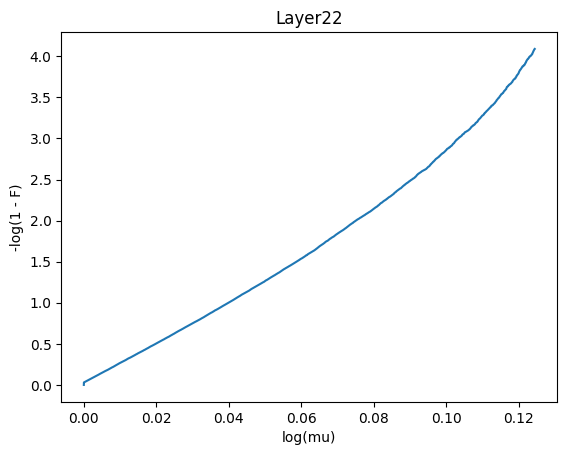

32343


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


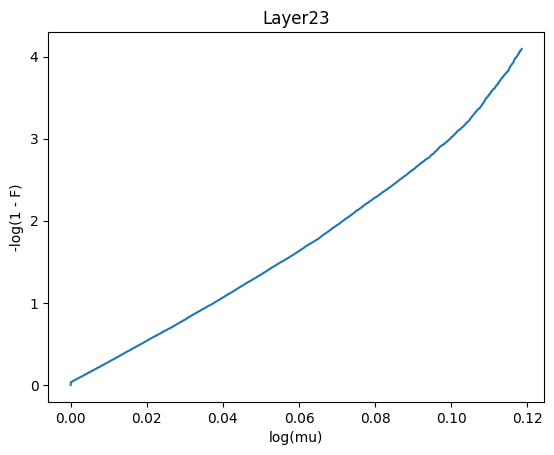

32303


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


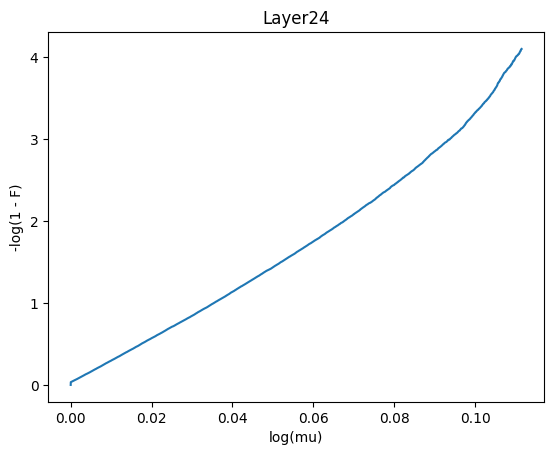

32065


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


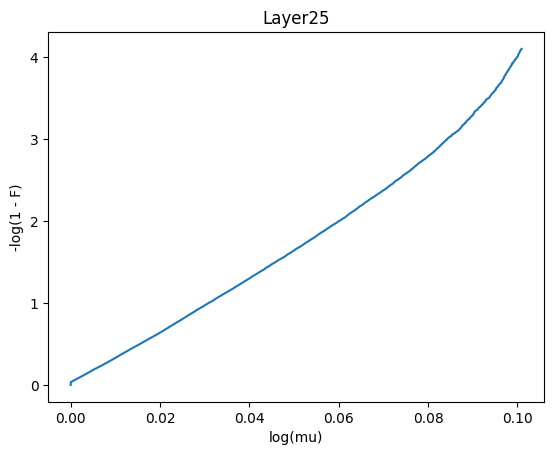

31862


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


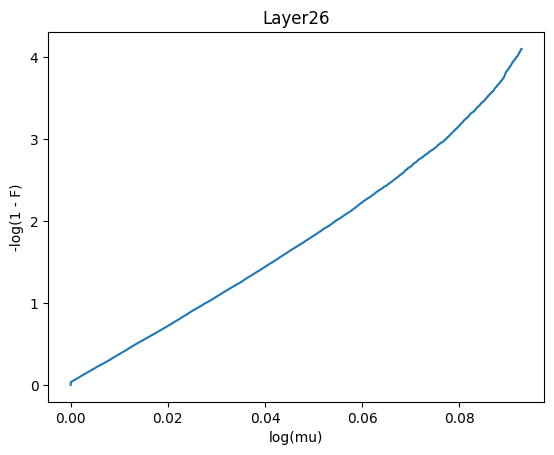

31543


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


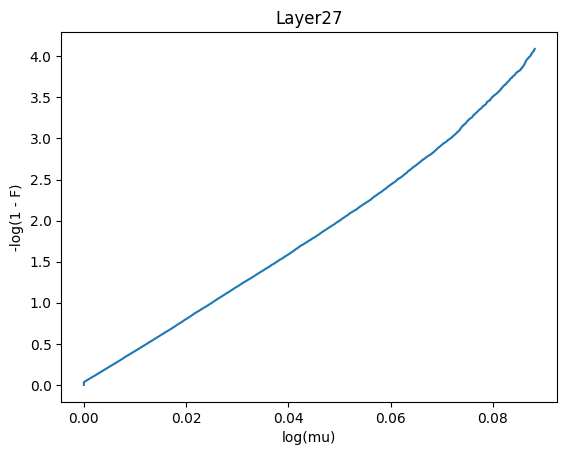

31546


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


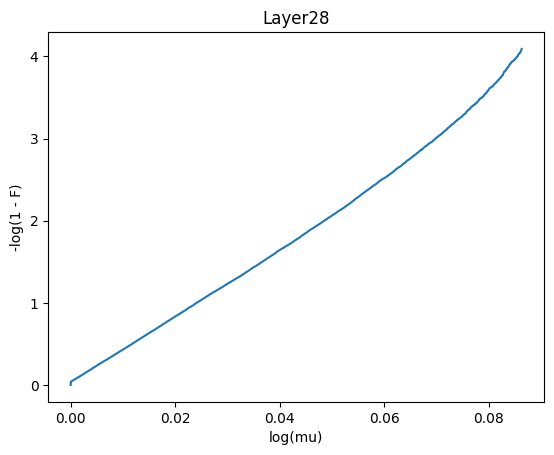

31261


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


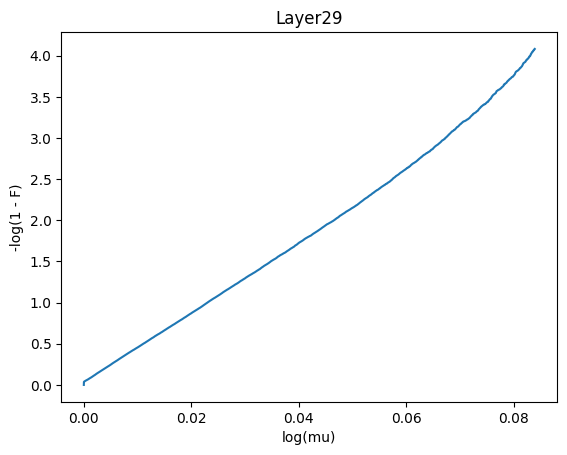

31123


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


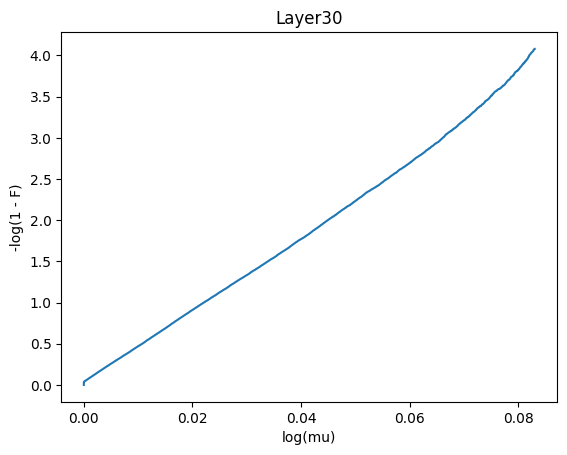

31095


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


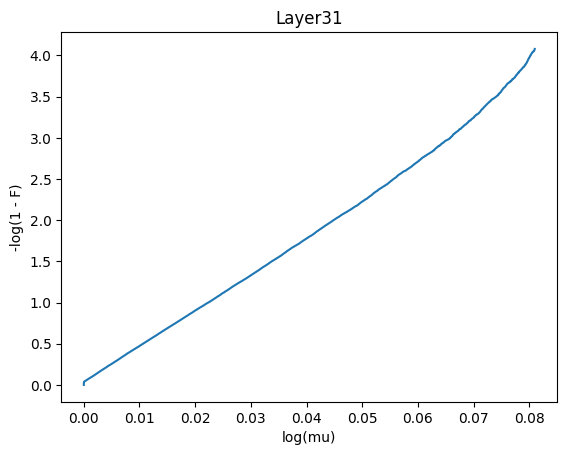

31016


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


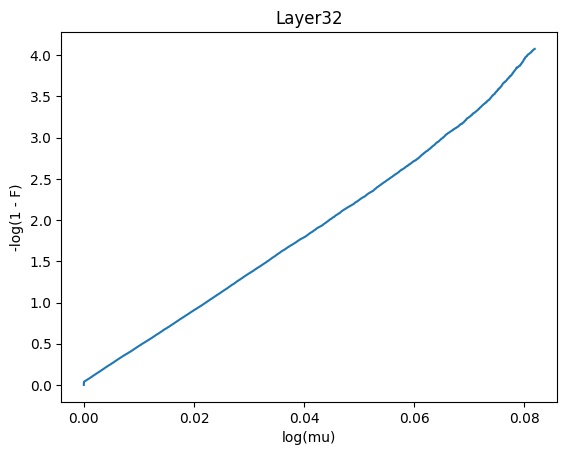

30945


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


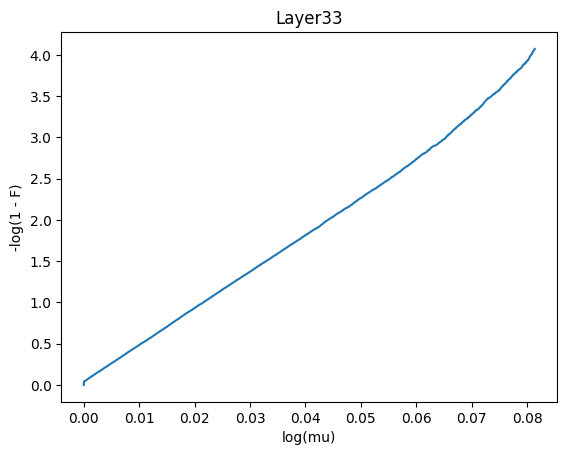

30979


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


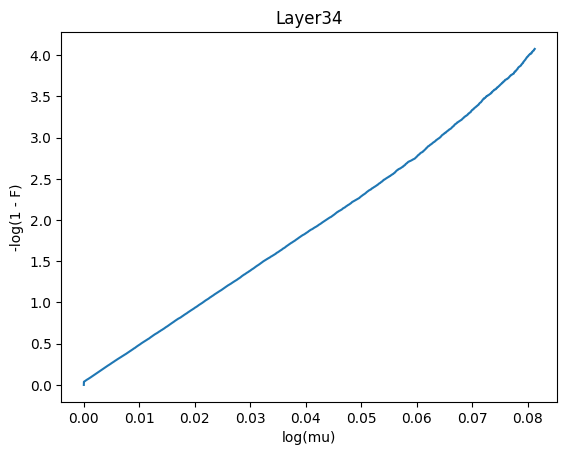

31264


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


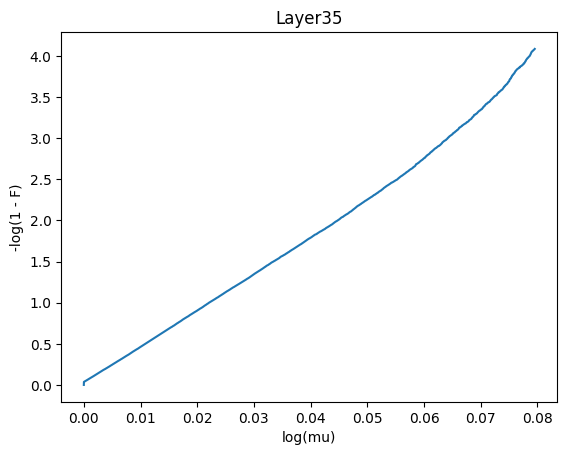

30234


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/1099014714.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


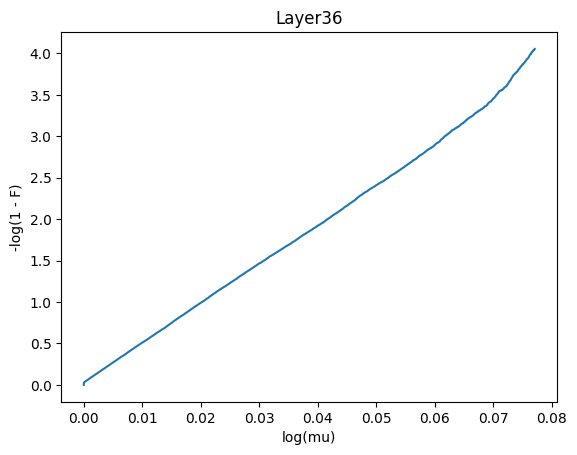

In [29]:
for i in range(tensor.shape[1]):
    no_outlier_plot(tensor[:, i, :], f"Layer{i}")
    
# -500, protgpt2

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


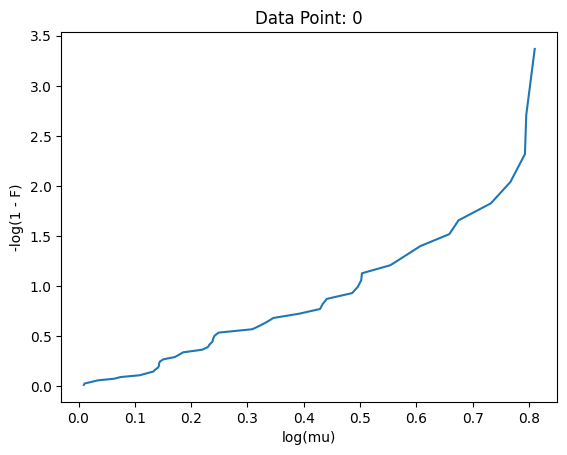

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


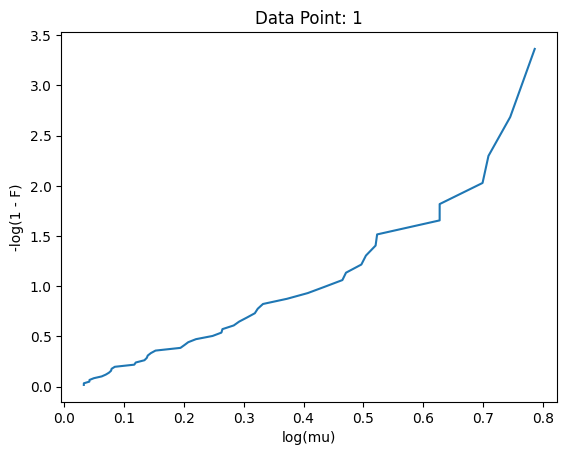

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


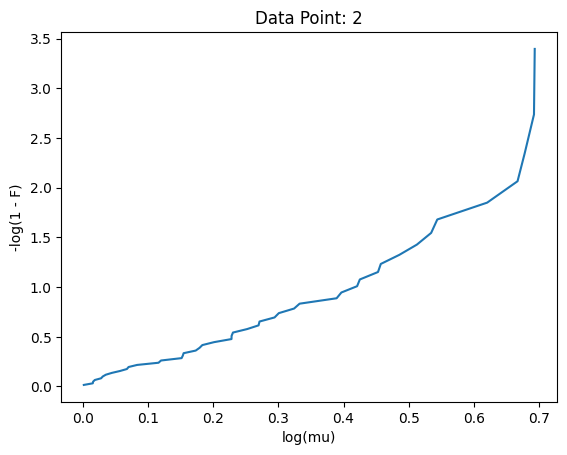

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


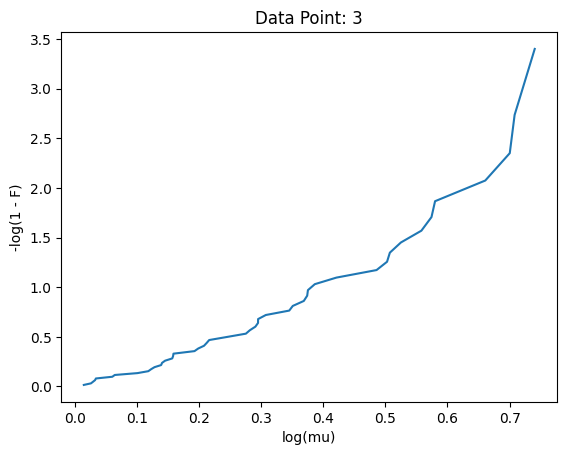

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


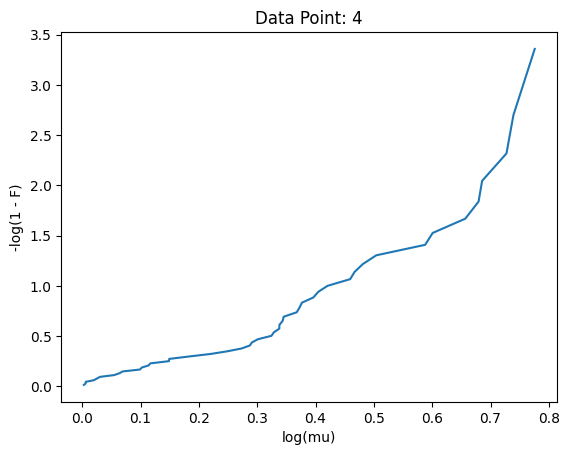

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


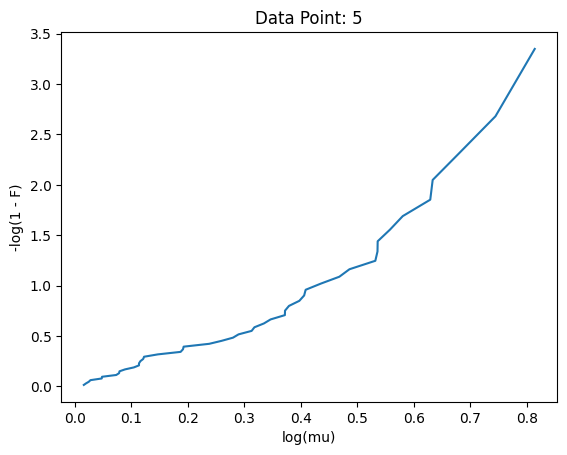

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


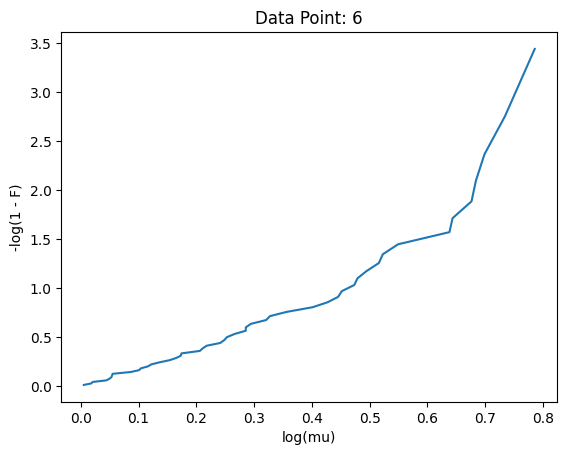

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


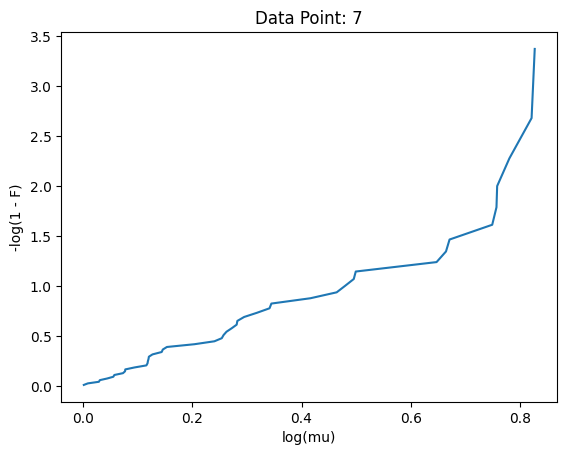

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


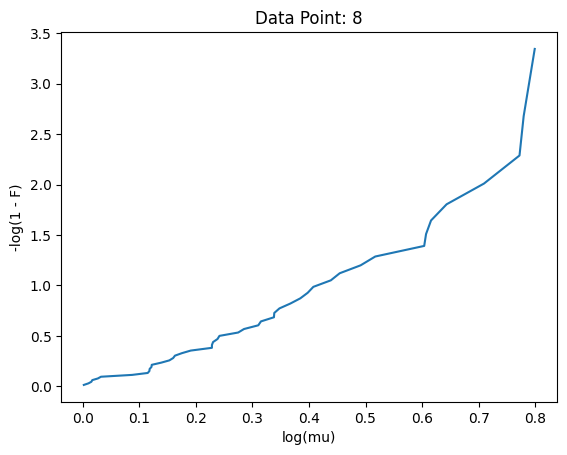

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


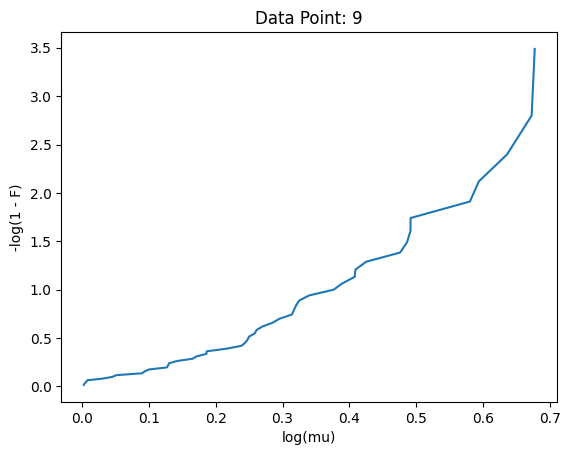

In [80]:
for i in range(0, 10):
    no_outlier_plot(tensor[i, :, :], f"Data Point: {i}")

In [70]:
tensor = torch.load(f"./../final_embeddings/protgpt2_merged_tensor.pt", map_location=torch.device('cpu'))

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


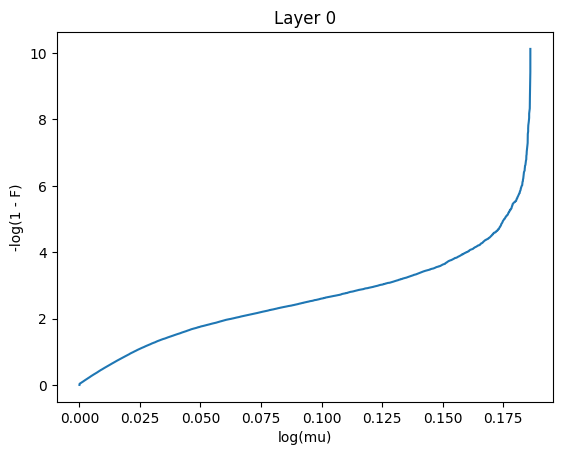

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


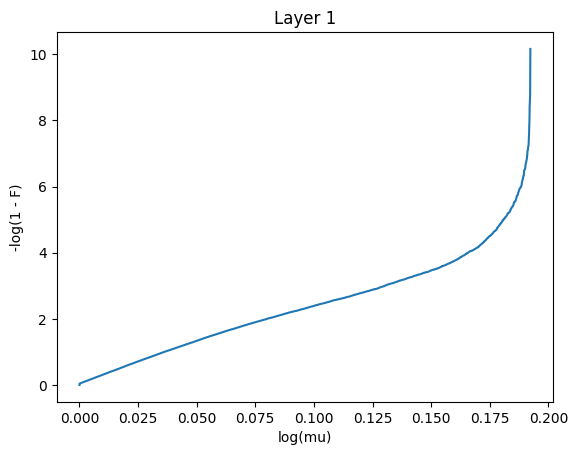

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


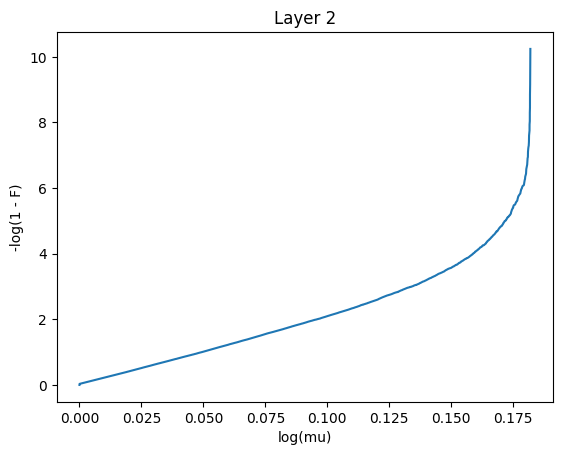

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


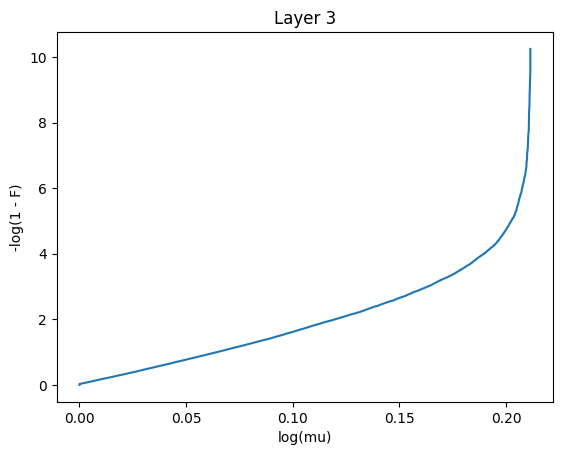

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


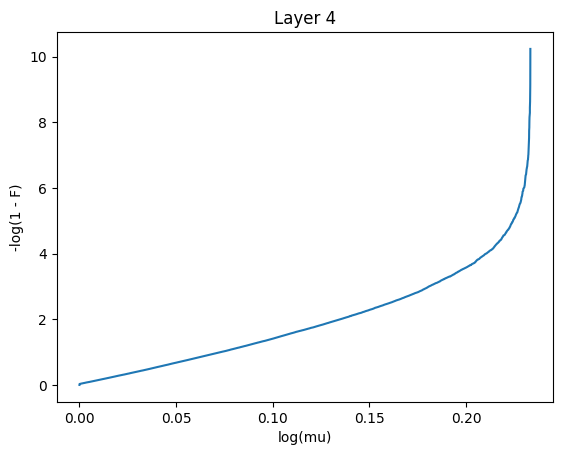

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


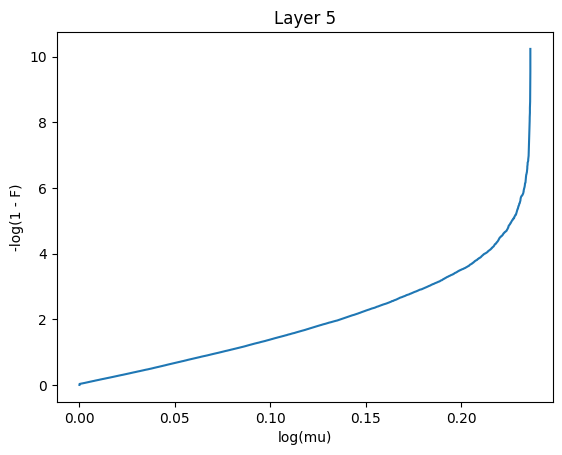

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


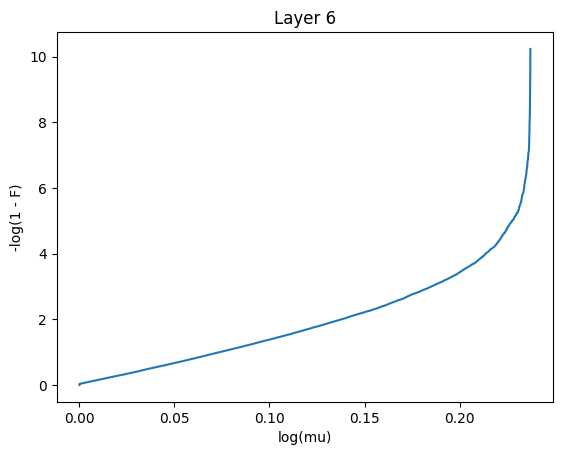

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


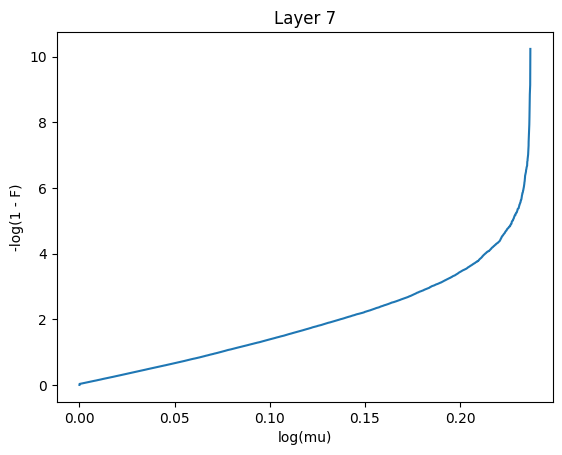

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


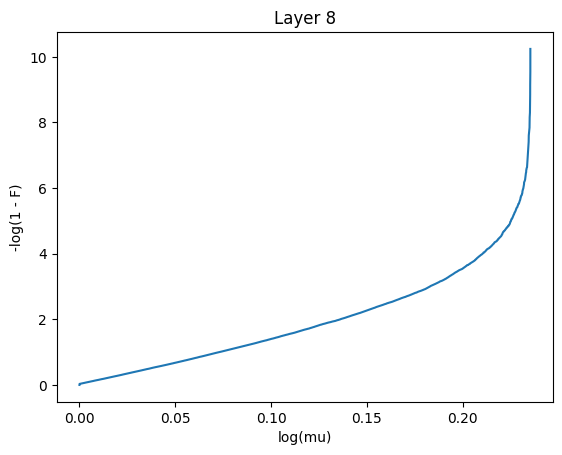

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


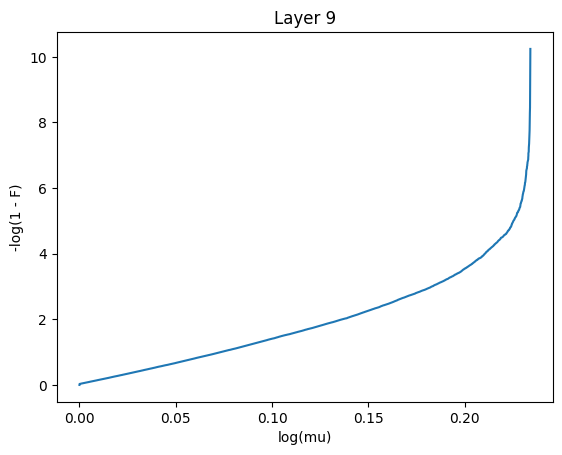

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


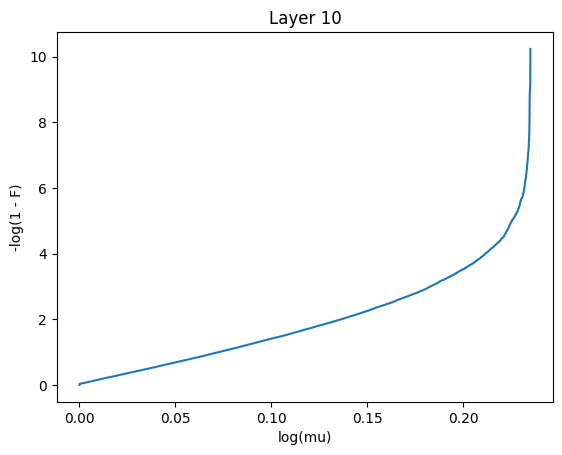

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


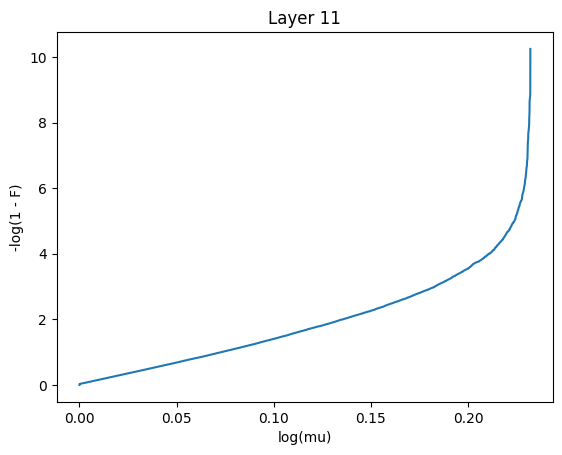

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


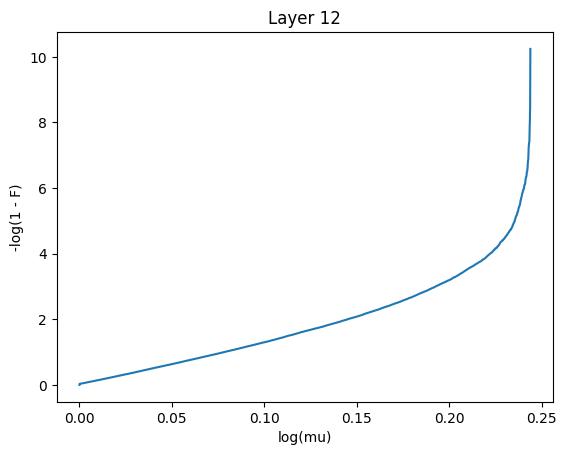

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


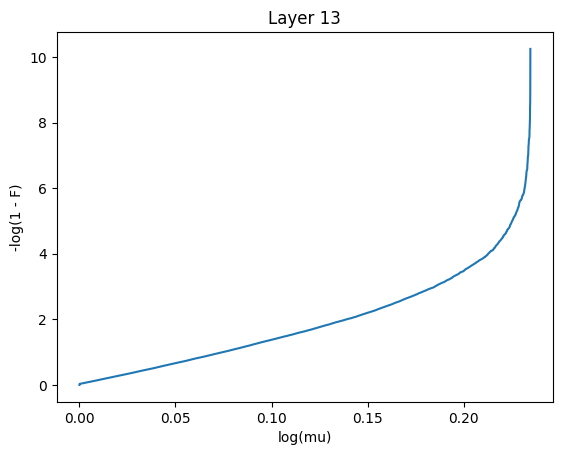

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


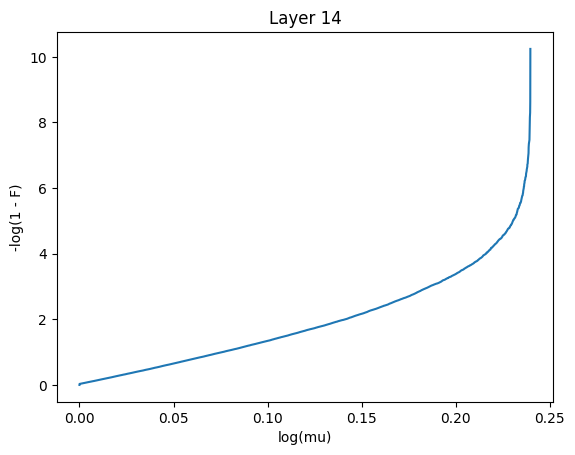

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


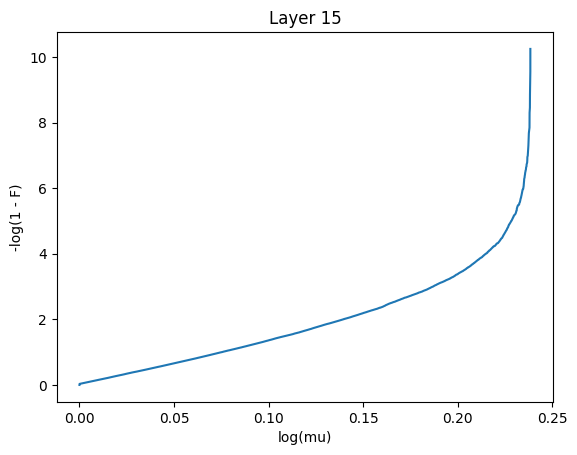

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


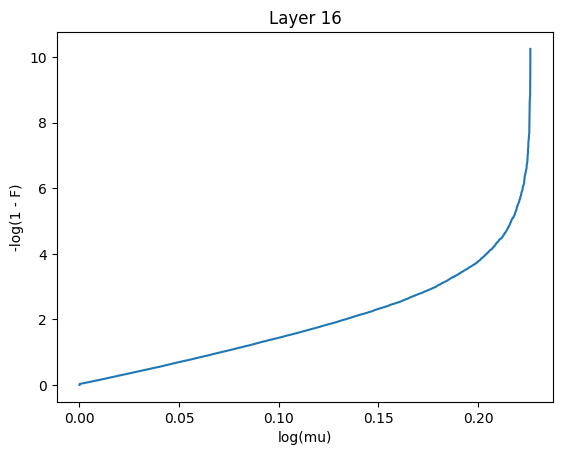

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


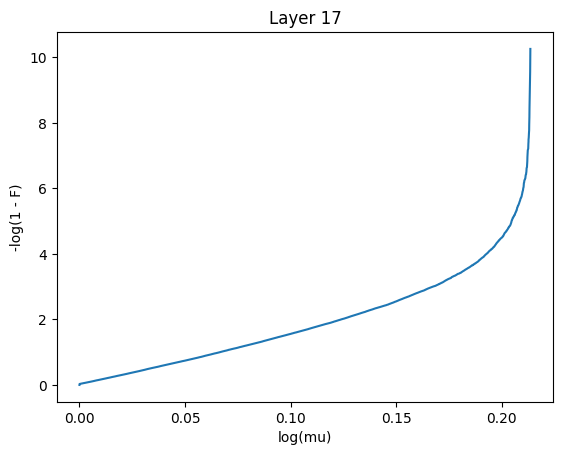

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


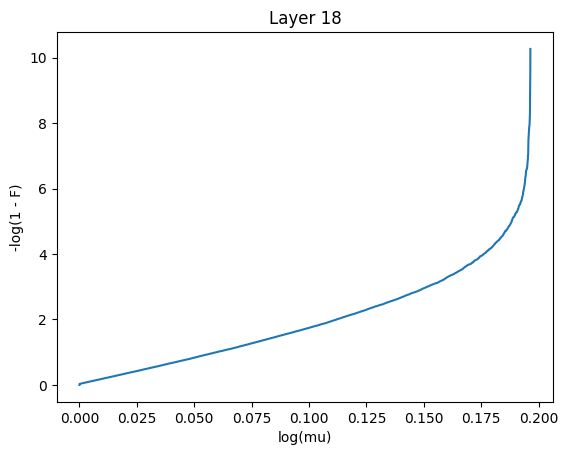

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


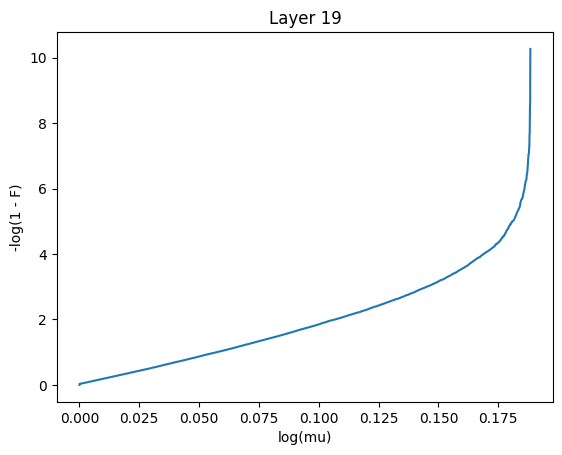

KeyboardInterrupt: 

In [71]:
for i in range(tensor.shape[1]):
    no_outlier_plot(tensor[:, i, :], f"Layer{i}")

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


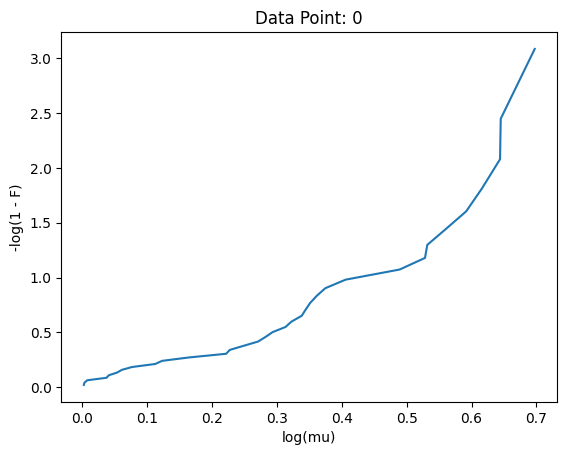

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


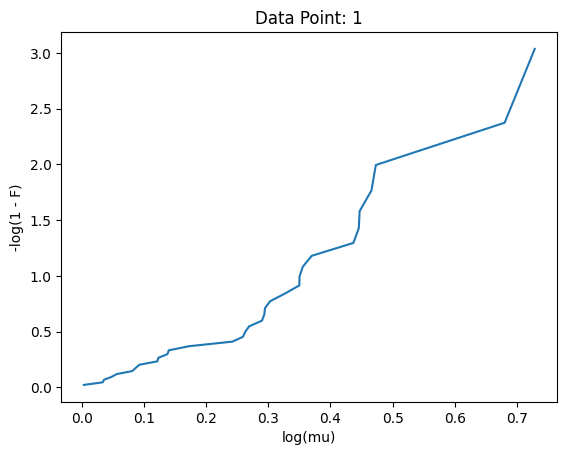

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


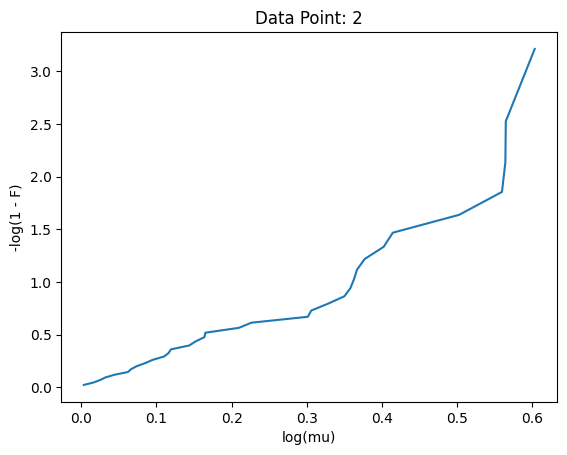

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


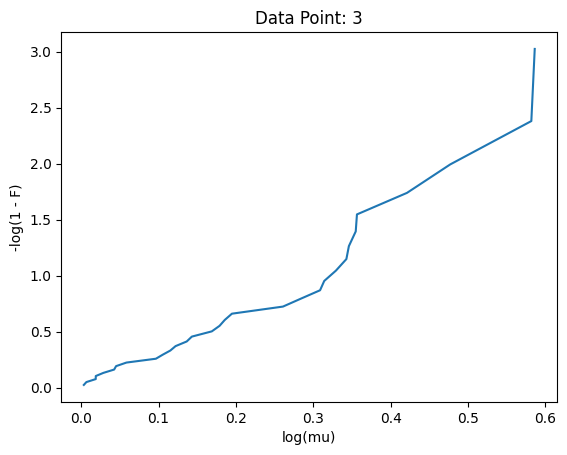

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


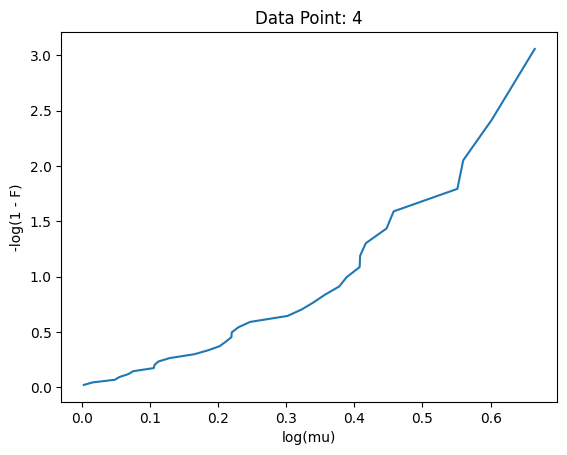

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


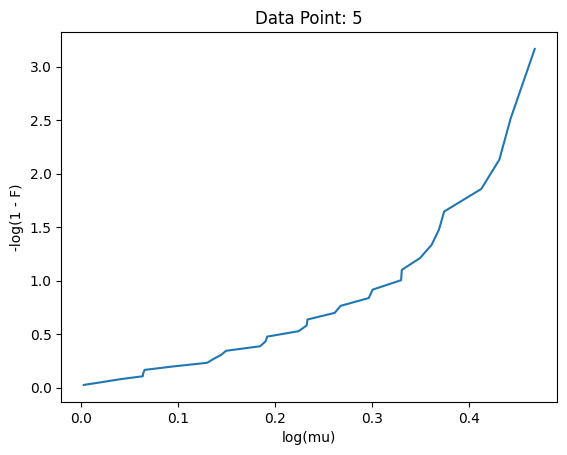

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


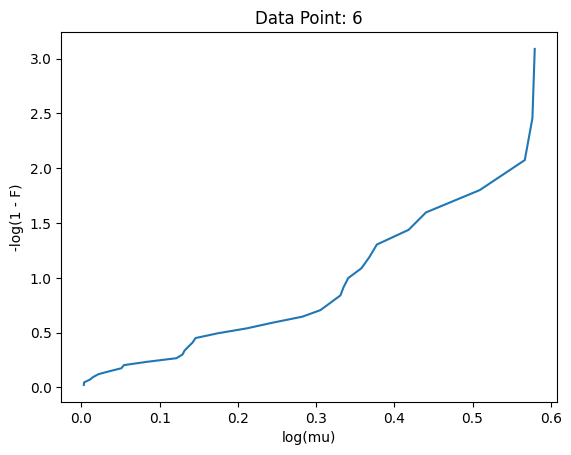

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


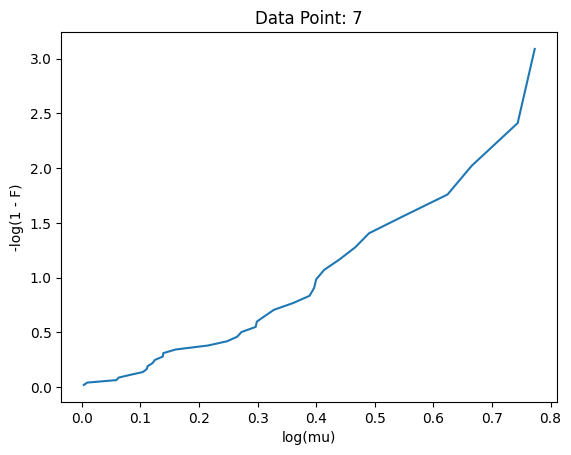

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


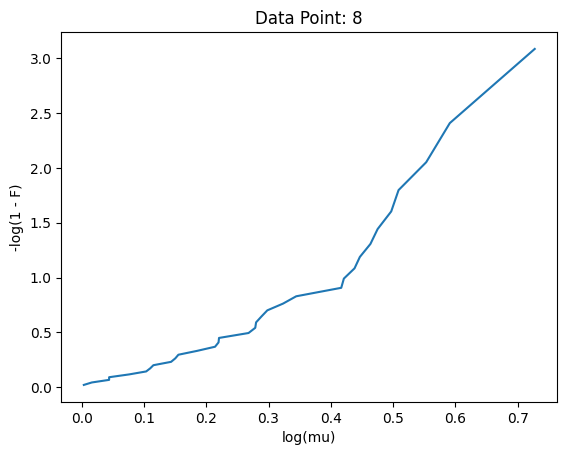

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


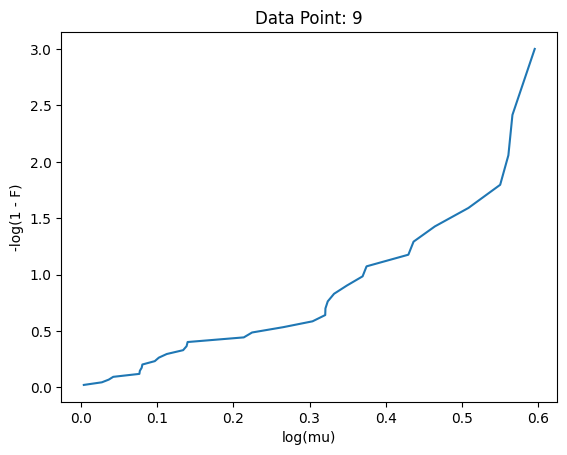

In [78]:
for i in range(0, 10):
    no_outlier_plot(tensor[i, :, :], f"Data Point: {i}")

### GET THE SLOPE FIXED 

In [16]:

def no_outlier_plot_2(data, title):

    knn = NearestNeighbors(n_neighbors=3).fit(data)
    distances, _ = knn.kneighbors(data)
    
    r1 = distances[:, 1]  # First nearest neighbor
    r2 = distances[:, 2]
    
    ratios = r2 / r1
    # Log-log cumulative density function (CDF)
    sorted_ratios = np.sort(ratios)
    cleaned_sorted_rations = sorted_ratios[~np.isnan(sorted_ratios) & ~np.isinf(sorted_ratios)]
    Q1 = np.percentile(cleaned_sorted_rations, 25)
    Q3 = np.percentile(cleaned_sorted_rations, 75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1
    upper_bound = Q3 
    
    print(lower_bound)
    print(upper_bound)
    
    # lower bound, upper bound
    # 0.1508718370445591
    # 2.5778964939927653       
    # Q1, Q3
    # 1.0610060834001365
    # 1.667762247637188

    
    # Remove outliers
    cleaned_no_outlier_sorted_rations = cleaned_sorted_rations[(cleaned_sorted_rations >= lower_bound) & (cleaned_sorted_rations <= upper_bound)]
    
    
    cumulative_sum = np.cumsum(cleaned_no_outlier_sorted_rations)
    
    # Step 3: Normalize to get the cumulative distribution
    cumulative_distribution = cumulative_sum / cumulative_sum[-1]
    
    x_axis = np.log(cleaned_no_outlier_sorted_rations)
    y_axis = -np.log(1 - cumulative_distribution)

    dy = np.diff(y_axis)

    # 2. Define a threshold for "sudden increase"
    #    This is just one heuristic. Adjust as needed.
    dy_mean = np.mean(dy)
    dy_std = np.std(dy)
    threshold = dy_mean + 2.0 * dy_std
    
    # 3. Find where dy > threshold
    #    np.diff() yields an array of length (len(y_axis) - 1),
    #    so we add +1 to match the original y_axis indices.
    sudden_increase_mask = (dy > threshold)
    sudden_increase_indices = np.where(sudden_increase_mask)[0] + 1
    
    print("Indices of sudden increase in the plotted array:", sudden_increase_indices)

    plt.plot(x_axis, y_axis)
    plt.xlabel('log(mu)')
    plt.ylabel('-log(1 - F)')
    plt.title(title)
    plt.show()


1.0610060834001365
1.667762247637188
Indices of sudden increase in the plotted array: []


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_29074/839059433.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_29074/839059433.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_29074/839059433.py:44: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)
/Users/salihtalhaakgun/miniconda3/envs/thesis/lib/python3.10/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


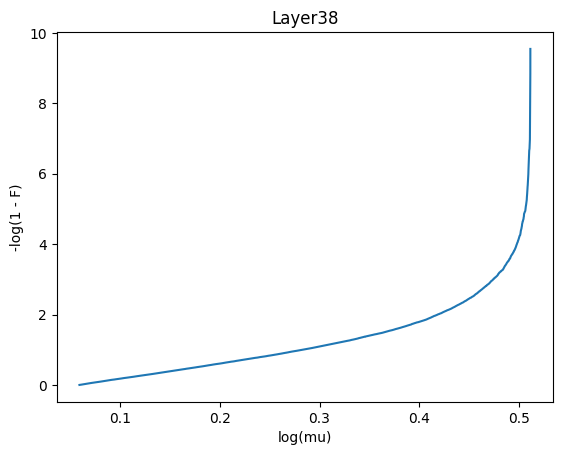

In [17]:
no_outlier_plot_2(tensor[:, i, :], f"Layer{i}")

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_29074/1381243570.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_29074/1381243570.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_29074/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


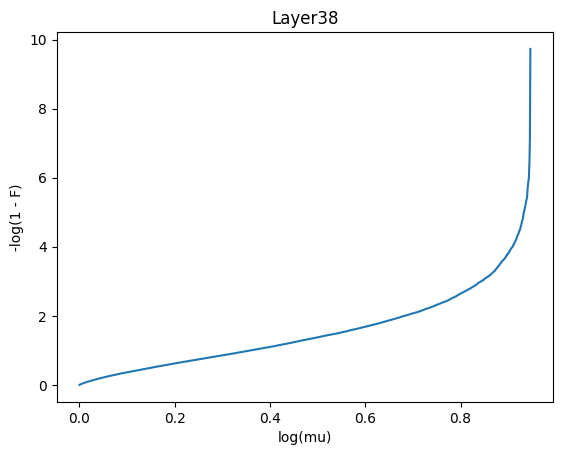

In [15]:
no_outlier_plot(tensor[:, i, :], f"Layer{i}")

In [ ]:
for i in range(tensor.shape[1]):
    no_outlier_plot_2(tensor[:, i, :], f"Layer{i}")
    
    
## Do the id calculations on the linear part.
## fold seek -> int. dim.

In [45]:
matrix = np.array(tensor[:, 16, :])

Q1 = np.percentile(matrix, 25, axis=0)
Q3 = np.percentile(matrix, 75, axis=0)
IQR = Q3 - Q1

# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows without outliers
non_outliers = np.all((matrix >= lower_bound) & (matrix <= upper_bound), axis=1)

# Remove outliers
filtered_matrix = matrix[non_outliers]


13971


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3486985918.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3486985918.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/3486985918.py:32: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


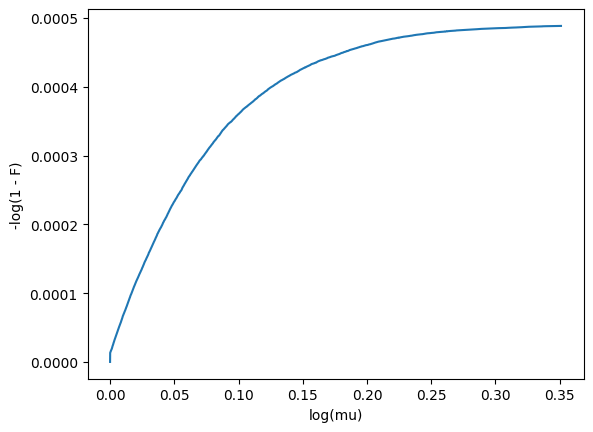

In [49]:
just_plot(filtered_matrix, "")

In [ ]:

def just_plot(data, title=""):

    knn = NearestNeighbors(n_neighbors=3).fit(data)
    distances, _ = knn.kneighbors(data)
    
    r1 = distances[:, 1]  # First nearest neighbor
    r2 = distances[:, 2]
    
    ratios = r2 / r1
    # Log-log cumulative density function (CDF)
    sorted_ratios = np.sort(ratios)
    cleaned_sorted_rations = sorted_ratios[~np.isnan(sorted_ratios) & ~np.isinf(sorted_ratios)]
    # Q1 = np.percentile(cleaned_sorted_rations, 25)
    # Q3 = np.percentile(cleaned_sorted_rations, 75)
    # 
    # # Calculate the IQR
    # IQR = Q3 - Q1
    # 
    # # Define the bounds for outliers
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    # 
    # Remove outliers
    # cleaned_no_outlier_sorted_rations = cleaned_sorted_rations[(cleaned_sorted_rations >= lower_bound) & (cleaned_sorted_rations <= upper_bound)]
    
    cumulative_sum = np.cumsum(cleaned_sorted_rations)
    
    # Step 3: Normalize to get the cumulative distribution
    cumulative_distribution = cumulative_sum / cumulative_sum[-1]
    
    x_axis = np.log(cleaned_sorted_rations)
    y_axis = -np.log(1 - cumulative_distribution)
    
    y_axis = y_axis[:-500]
    x_axis = x_axis[:len(y_axis)]
    
    print(len(y_axis))
    
    
    plt.plot(x_axis, y_axis)
    plt.xlabel('log(mu)')
    plt.ylabel('-log(1 - F)')
    plt.title(title)
    plt.show()


In [47]:

def find_indexes(data, title=""):

    knn = NearestNeighbors(n_neighbors=3).fit(data)
    distances, _ = knn.kneighbors(data)
    
    r1 = distances[:, 1]  # First nearest neighbor
    r2 = distances[:, 2]
    
    ratios = r2 / r1
    # Log-log cumulative density function (CDF)
    sorted_ratios = np.sort(ratios)
    cleaned_sorted_rations = sorted_ratios[~np.isnan(sorted_ratios) & ~np.isinf(sorted_ratios)]
    Q1 = np.percentile(cleaned_sorted_rations, 25)
    Q3 = np.percentile(cleaned_sorted_rations, 75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    cleaned_no_outlier_sorted_rations = cleaned_sorted_rations[(cleaned_sorted_rations >= lower_bound) & (cleaned_sorted_rations <= upper_bound)]
    
    cumulative_sum = np.cumsum(cleaned_no_outlier_sorted_rations)
    
    # Step 3: Normalize to get the cumulative distribution
    cumulative_distribution = cumulative_sum / cumulative_sum[-1]
    
    x_axis = np.log(cleaned_sorted_rations)
    y_axis = -np.log(1 - cumulative_distribution)
    
    y_axis = y_axis[:-500]
    x_axis = x_axis[:len(y_axis)]
    
    print(len(y_axis))
    
    
    plt.plot(x_axis, y_axis)
    plt.xlabel('log(mu)')
    plt.ylabel('-log(1 - F)')
    plt.title(title)
    plt.show()


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def find_indexes_to_remove(data, title=""):
    """
    Computes r2/r1 using the Nearest Neighbors distances.
    Identifies indices of invalid values, outliers, and the last 500
    points in the ratio-sorted distribution.

    Returns:
        indices_to_remove (np.ndarray): array of indices to remove from 'data'.
    """
    
    # Fit k-NN and get distances
    knn = NearestNeighbors(n_neighbors=3).fit(data)
    distances, _ = knn.kneighbors(data)
    
    r1 = distances[:, 1]  # distance to the 1st neighbor
    r2 = distances[:, 2]  # distance to the 2nd neighbor
    ratios = r2 / r1      # ratio = r2/r1

    # ------------------------------------------------------------------
    # 1) Identify invalid (NaN, Inf) ratio values
    # ------------------------------------------------------------------
    invalid_mask = np.isnan(ratios) | np.isinf(ratios)
    
    # ------------------------------------------------------------------
    # 2) Identify outliers based on IQR
    #    Only compute IQR on valid (non-NaN, non-Inf) points
    # ------------------------------------------------------------------
    valid_ratios = ratios[~invalid_mask]
    Q1 = np.percentile(valid_ratios, 25)
    Q3 = np.percentile(valid_ratios, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_mask = (ratios < lower_bound) | (ratios > upper_bound)
    
    # ------------------------------------------------------------------
    # Combine invalid + outlier masks
    # ------------------------------------------------------------------
    # We'll keep only those that are both valid and in-bounds
    valid_and_in_bounds_mask = ~invalid_mask & ~outlier_mask
    
    # ------------------------------------------------------------------
    # 3) Identify indices for the last 500 ratios among valid in-bounds
    # ------------------------------------------------------------------
    # Sort the "valid and in-bounds" points by their ratio value 
    valid_in_bounds_indices = np.where(valid_and_in_bounds_mask)[0]
    sorted_valid_in_bounds_indices = valid_in_bounds_indices[np.argsort(ratios[valid_in_bounds_indices])]

    # We only remove the last 500 if we have more than 500 valid points
    if len(sorted_valid_in_bounds_indices) > 500:
        last_500_indices = sorted_valid_in_bounds_indices[-500:]
    else:
        last_500_indices = np.array([], dtype=int)
    
    # ------------------------------------------------------------------
    # Gather all indices to remove:
    #   - invalid ratio points
    #   - outliers
    #   - last 500 points in the sorted distribution
    # ------------------------------------------------------------------
    invalid_or_outlier_indices = np.where(invalid_mask | outlier_mask)[0]
    indices_to_remove = np.concatenate([invalid_or_outlier_indices, last_500_indices])
    indices_to_remove = np.unique(indices_to_remove)  # ensure sorted & unique

    # ------------------------------------------------------------------
    # (Optional) Diagnostic plotting
    #   - Plot the log-log CDF for the in-bounds, valid data
    #   - Then show how many points remain after removing last 500
    # ------------------------------------------------------------------
    
    # We'll use the ratio values that are valid and in-bounds
    cleaned_ratios = ratios[valid_and_in_bounds_mask]
    cleaned_sorted_ratios = np.sort(cleaned_ratios)
    
    # CDF
    cumulative_sum = np.cumsum(cleaned_sorted_ratios)
    cumulative_distribution = cumulative_sum / cumulative_sum[-1]
    
    # Log-axes
    x_axis = np.log(cleaned_sorted_ratios)
    y_axis = -np.log(1 - cumulative_distribution)

    # Truncate the tail (last 500) for plotting
    # Check that we actually have > 500 points
    truncate_count = min(500, len(y_axis))
    y_axis_truncated = y_axis[:-truncate_count]
    x_axis_truncated = x_axis[:len(y_axis_truncated)]
    
    plt.figure(figsize=(6,4))
    plt.plot(x_axis_truncated, y_axis_truncated, label='Truncated tail')
    plt.xlabel('log(mu)')
    plt.ylabel('-log(1 - F)')
    plt.title(title if title else 'Log-Log CDF')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return indices_to_remove


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/285377650.py:21: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1      # ratio = r2/r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/285377650.py:21: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1      # ratio = r2/r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/285377650.py:86: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


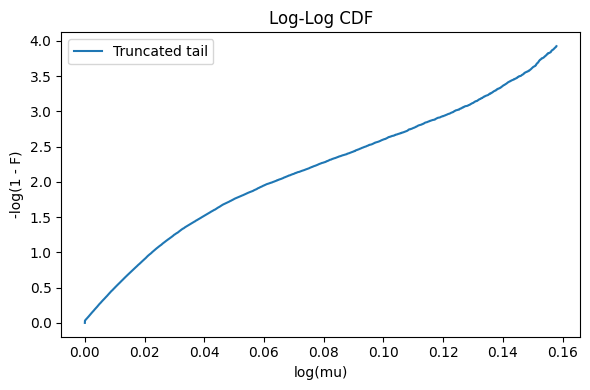

In [51]:
indexes = find_indexes_to_remove(tensor[:, 0, :])

In [52]:
indexes.shape

(8171,)

In [53]:
indexes


array([   19,    25,    27, ..., 36886, 36887, 36891])

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/285377650.py:21: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1      # ratio = r2/r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/285377650.py:21: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1      # ratio = r2/r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_55904/285377650.py:86: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


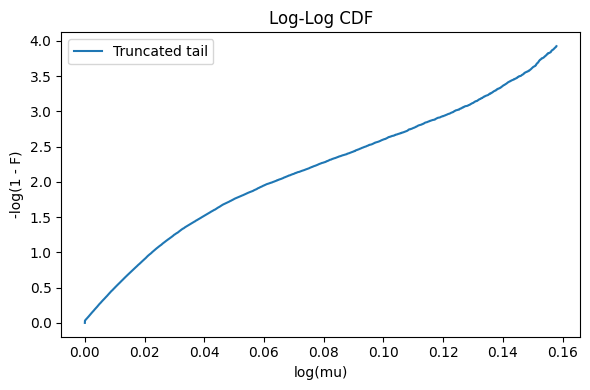

TypeError: just_plot() missing 1 required positional argument: 'title'

In [54]:
d = find_indexes_to_remove(tensor[:, 0, :])
just_plot(np.delete(tensor[:, 0, :], d, axis=0))

In [ ]:
### Calculate ID
for i in tensor.shape[1]:
    indices = find_indexes_to_remove(tensor[:, i, :])    
    filtered_tensor = np.delete(tensor[:, i, :], indices, axis=0)
    